## Importing Libraries

In [2]:
# Uncomment if running on Google Colab
#!pip install mne gdown

import mne
import scipy.io
import numpy as np
import pathlib
import gdown
import zipfile
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
%matplotlib inline

## Downloading the zipped data file from Google Drive

In [3]:
cwd = pathlib.Path.cwd()

# Download zip file, if data folder doesn't exist
if not ((cwd/'data.zip').exists() or ((cwd/'data').exists and (cwd/'data').is_dir())):
    url = 'https://drive.google.com/file/d/1y5r8yVxDHqvHck1hsX6TIjnXRpOTP4RE/view?usp=sharing'
    output = 'data.zip'
    gdown.download(url, output, fuzzy=True)


# Extract zip file to the current working directory
if not ((cwd/'data').exists and (cwd/'data').is_dir()):
    with zipfile.ZipFile(cwd/'data.zip', 'r') as zip_ref:
        zip_ref.extractall(cwd)

    # Delete zip file
    (cwd/'data.zip').unlink()

## Importing data

In [4]:
# Get an array of file paths of each subject
directory = pathlib.Path('data')
files = directory.glob('*.mat')
file_paths = sorted([file for file in files if file.is_file()])


def create_folder(path):
    # Define the folder path
    folder_path = pathlib.Path(path)  # Replace this with the path to your folder

    # Check if the folder exists
    if not folder_path.exists():
        # If the folder doesn't exist, create it
        folder_path.mkdir(parents=True, exist_ok=True)
        print(f"Folder '{folder_path}' created successfully.")
    else:
        print(f"Folder '{folder_path}' already exists.")


## Processing Matlab data to Python data object

**Markers for Y**
1\. key press with left index finger

2\. key press with right index finger

3\. key press with left index finger

4\. key press with right index finger

5\. screen freeze

10\. init level

11\. next level

12\. Pacman avatar died

20\. start game

21\. end game

22\. start normal condition

23\. end normal condition

24\. start frustration condition

25\. end frustration condition

26\. start self assessment

27\. end self assessment

28\. start pause

29\. end pause

100–109\. valence response 

110–119\. arousal response 

120–129\. dominance response


In [112]:
def process_mat_file(file_path):
    mat = scipy.io.loadmat(file_path)

    chann = np.array([mat['chann'][0][i][0] for i in range(len(mat['chann'][0]))])
    X = mat['X']
    I = mat['I']
    Y = mat['Y'][0]

    mask = np.isin(chann, ['GSR2', 'Erg1', 'Erg2'], invert=True)

    chann = chann[mask]
    X = X[mask]


    maxes = np.max(X, axis=1)
    
    mins = np.min(X, axis=1)

    diff = np.dot((maxes - mins).reshape((44, 1)),  np.ones((1, len(X[0]))))


    # X = X / diff

    mean = np.mean(X, axis=1)
    
    # X = X - mean.reshape((44, 1))

    id_lab = np.array([mat['id_lab'][0][i][0] for i in range(len(mat['id_lab'][0]))])

    return {'X': X, 'Y': Y, 'id_lab': id_lab, 'chann': chann, 'I': I}

# Example to obtain processed data from a file
# data = process_mat_file('data/S00.mat')
# data.keys()

No projector specified for this dataset. Please consider the method self.add_proj.
No projector specified for this dataset. Please consider the method self.add_proj.
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Bad Channels:  ['Fp2', 'T7', 'C3', 'F8', 'C4', 'FC6', 'F7', 'CP5', 'AF4', 'FC5', 'T8']


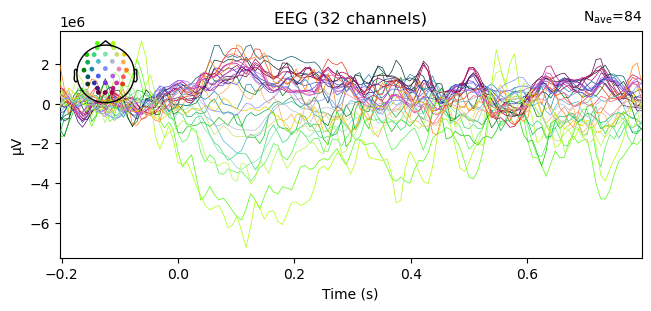

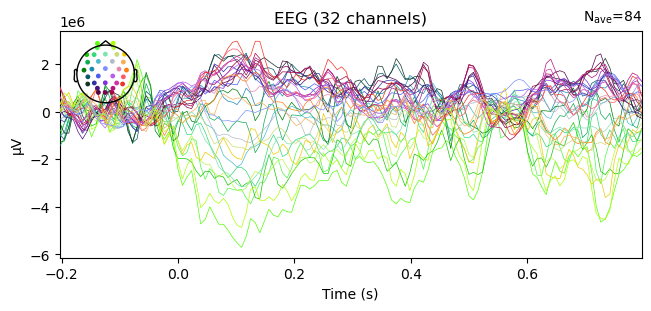

Need more than one channel to make topography for eeg. Disabling interactivity.


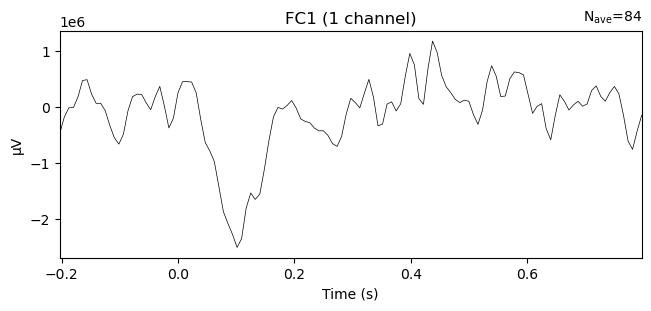

Need more than one channel to make topography for eeg. Disabling interactivity.


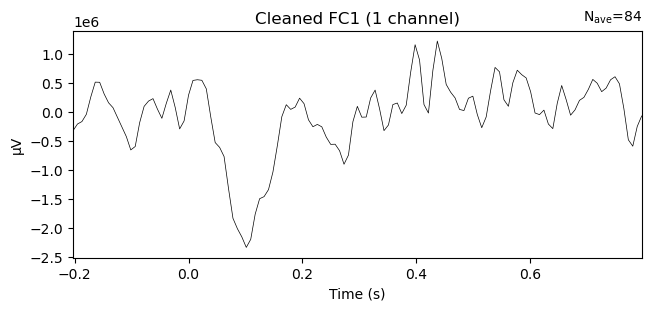

Need more than one channel to make topography for eeg. Disabling interactivity.


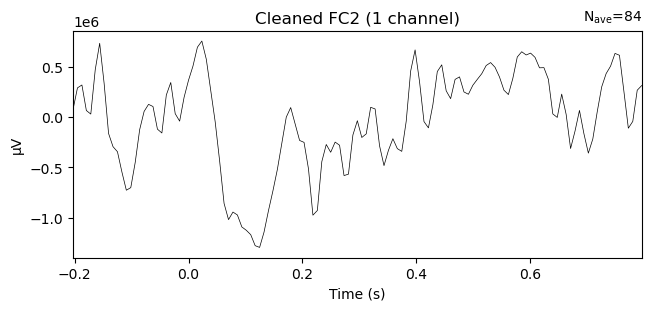

Need more than one channel to make topography for eeg. Disabling interactivity.


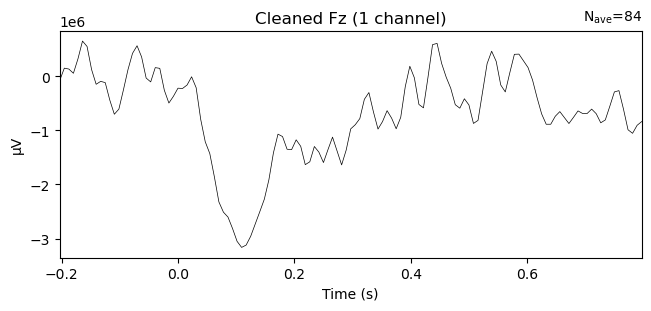

No projector specified for this dataset. Please consider the method self.add_proj.
No projector specified for this dataset. Please consider the method self.add_proj.
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Bad Channels:  ['Fp1', 'Fp2', 'T7', 'P7', 'F7', 'Cz']


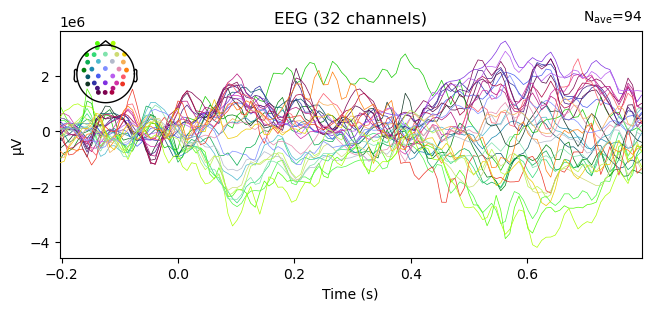

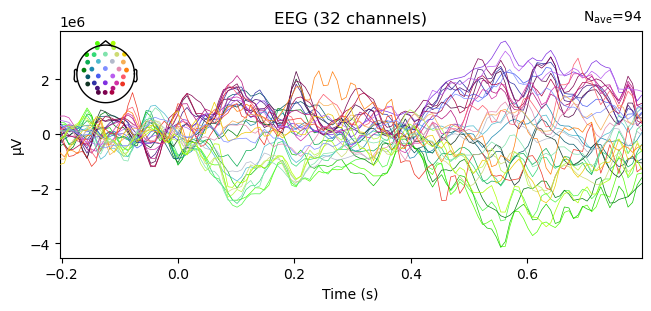

Need more than one channel to make topography for eeg. Disabling interactivity.


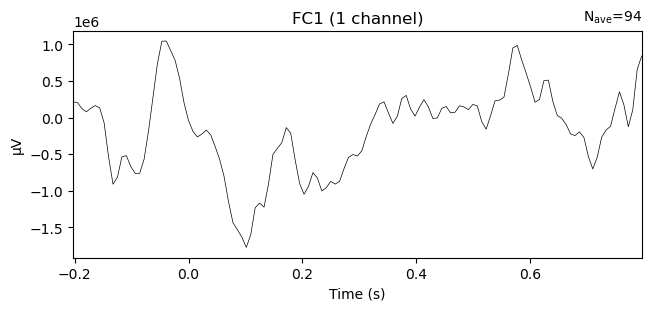

Need more than one channel to make topography for eeg. Disabling interactivity.


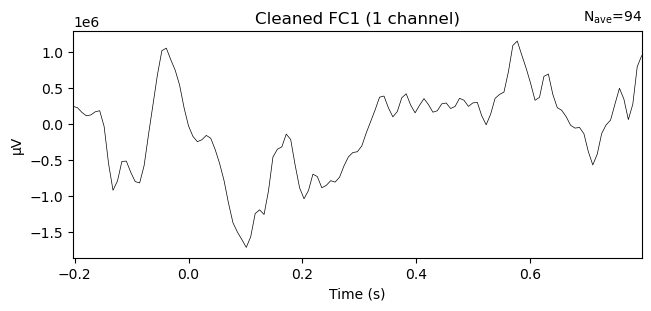

Need more than one channel to make topography for eeg. Disabling interactivity.


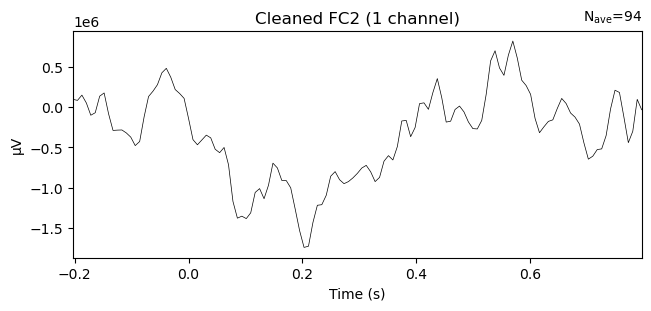

Need more than one channel to make topography for eeg. Disabling interactivity.


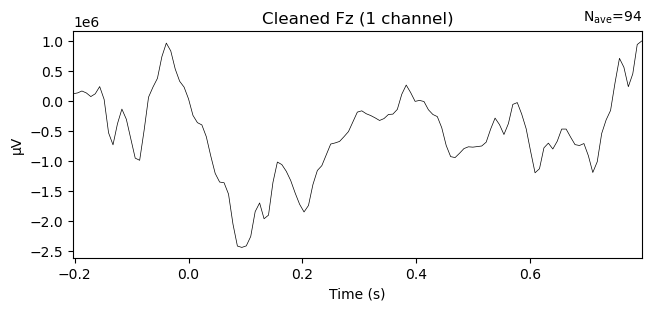

No projector specified for this dataset. Please consider the method self.add_proj.
No projector specified for this dataset. Please consider the method self.add_proj.
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Bad Channels:  ['F3', 'T7', 'FC6', 'AF4', 'Fp2', 'F8', 'C4', 'P7', 'AF3', 'F7', 'P8', 'CP1', 'P4', 'P3', 'CP6', 'Fp1', 'CP5', 'CP2', 'T8']


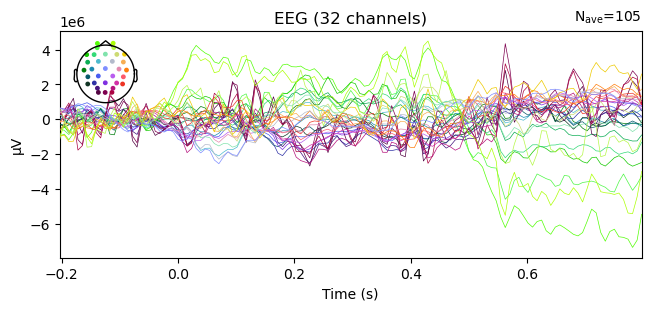

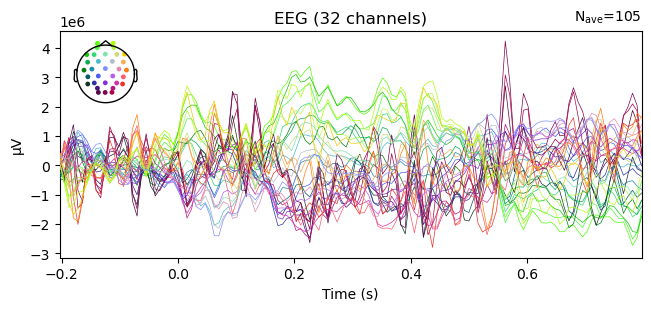

Need more than one channel to make topography for eeg. Disabling interactivity.


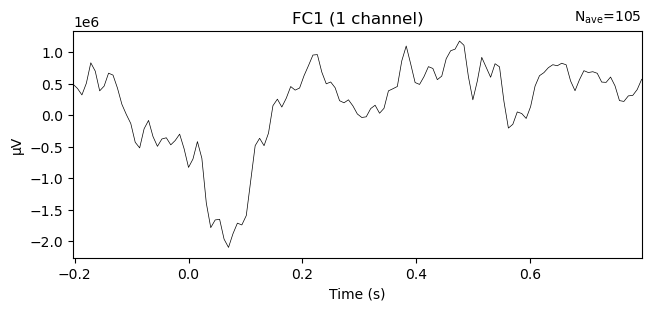

Need more than one channel to make topography for eeg. Disabling interactivity.


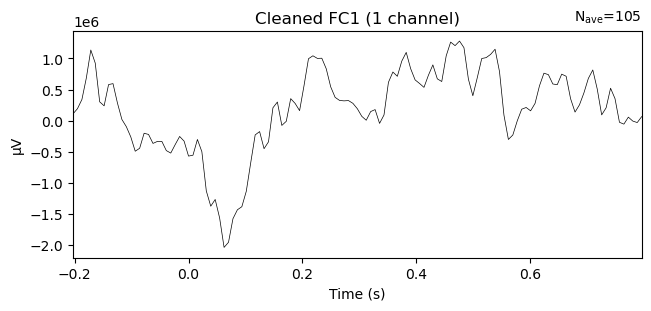

Need more than one channel to make topography for eeg. Disabling interactivity.


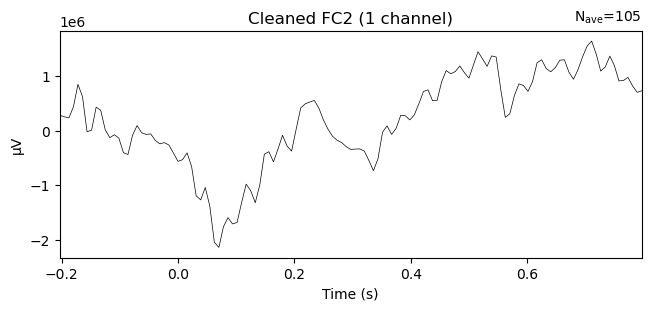

Need more than one channel to make topography for eeg. Disabling interactivity.


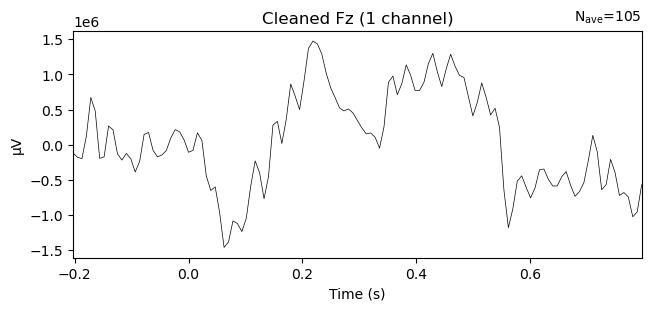

No projector specified for this dataset. Please consider the method self.add_proj.
No projector specified for this dataset. Please consider the method self.add_proj.
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Bad Channels:  ['Fp1', 'Fp2', 'T7', 'F8', 'AF3', 'F7', 'CP2', 'FC5', 'P8', 'T8']


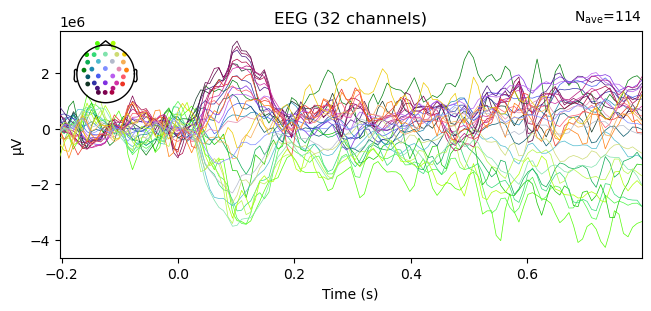

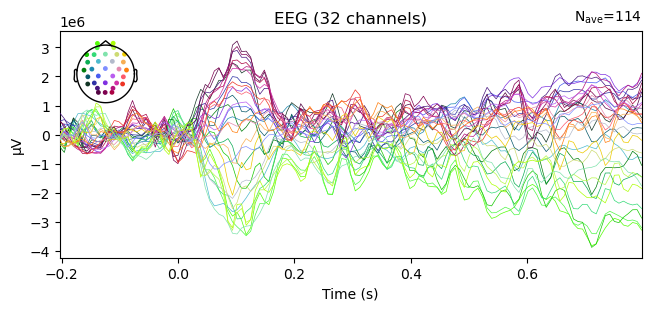

Need more than one channel to make topography for eeg. Disabling interactivity.


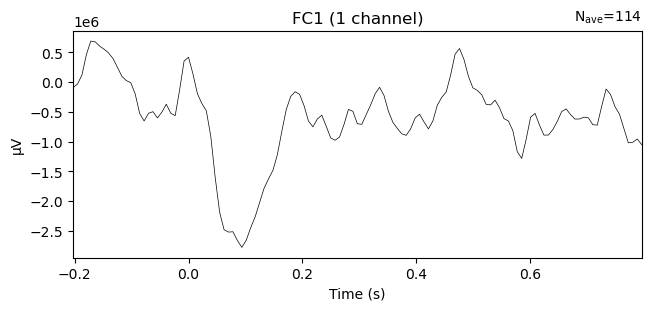

Need more than one channel to make topography for eeg. Disabling interactivity.


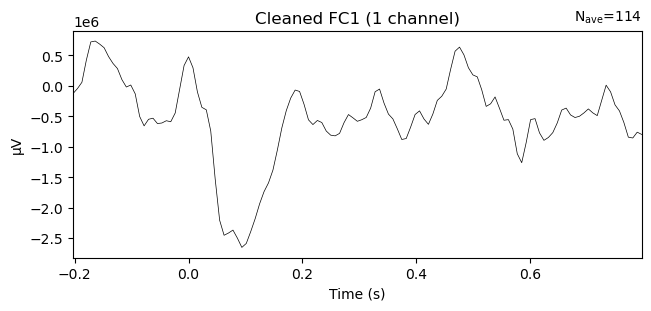

Need more than one channel to make topography for eeg. Disabling interactivity.


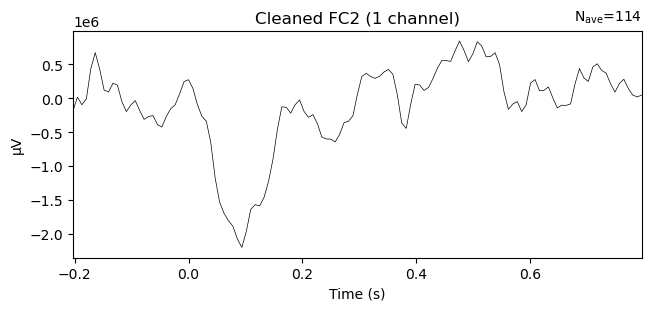

Need more than one channel to make topography for eeg. Disabling interactivity.


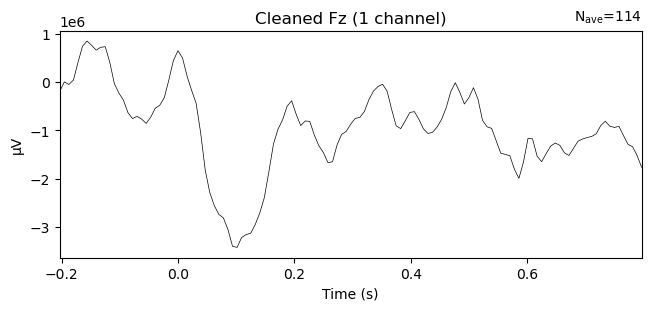

No projector specified for this dataset. Please consider the method self.add_proj.
No projector specified for this dataset. Please consider the method self.add_proj.
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Bad Channels:  ['Fp1', 'Fp2', 'T7', 'P7', 'AF3', 'CP5', 'Cz', 'T8']


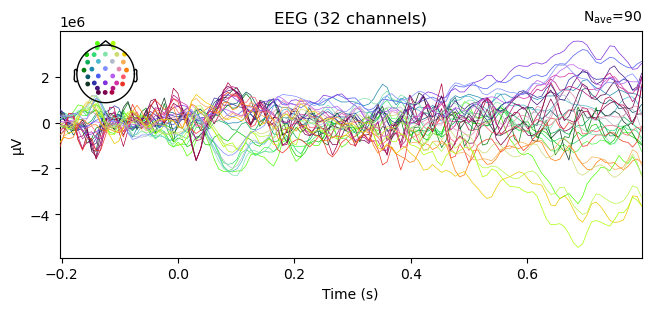

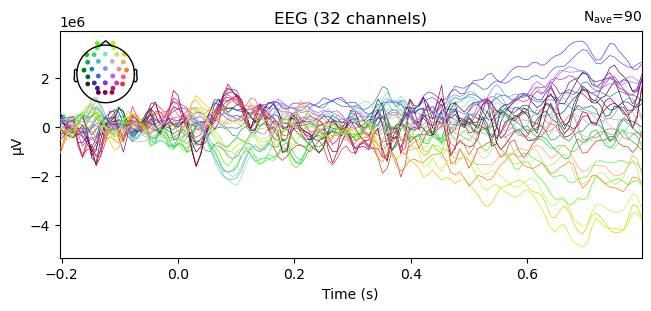

Need more than one channel to make topography for eeg. Disabling interactivity.


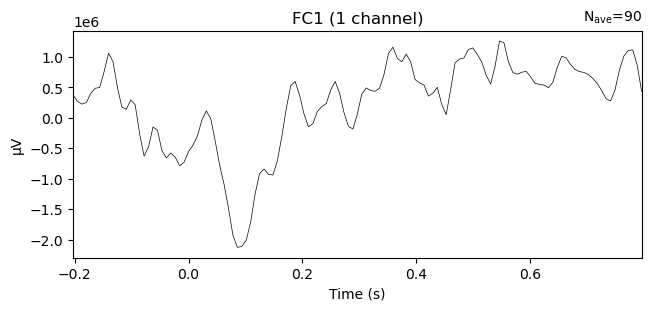

Need more than one channel to make topography for eeg. Disabling interactivity.


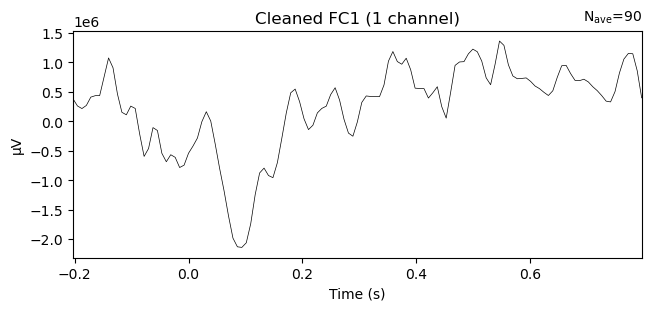

Need more than one channel to make topography for eeg. Disabling interactivity.


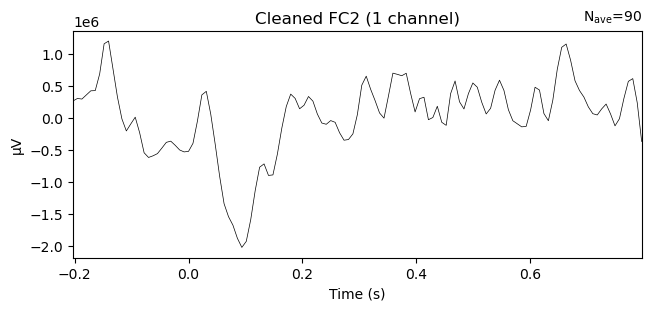

Need more than one channel to make topography for eeg. Disabling interactivity.


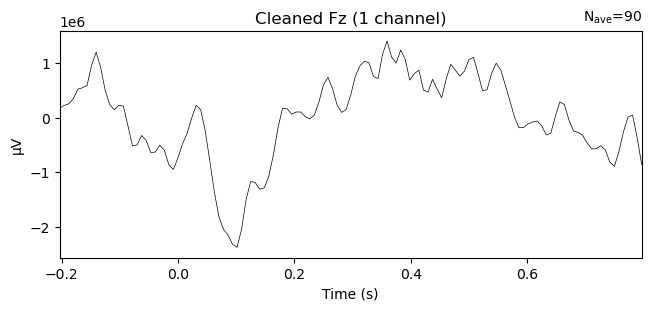

No projector specified for this dataset. Please consider the method self.add_proj.
No projector specified for this dataset. Please consider the method self.add_proj.
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Bad Channels:  ['Fp1', 'Fp2', 'T7', 'F8', 'C3', 'AF3', 'FC6', 'P3', 'CP5', 'AF4', 'T8', 'CP1', 'P4']


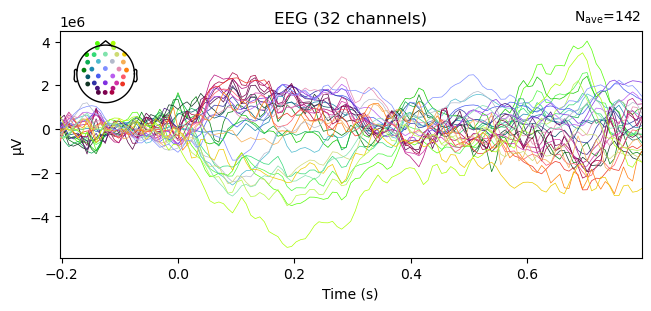

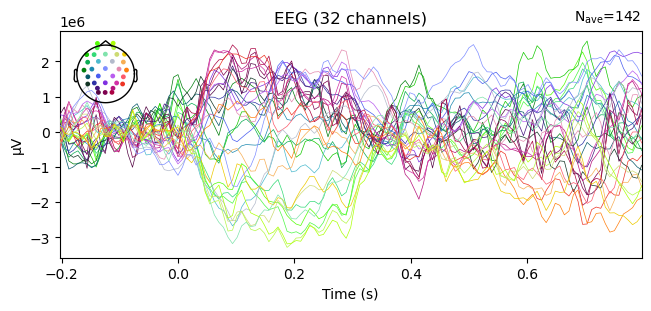

Need more than one channel to make topography for eeg. Disabling interactivity.


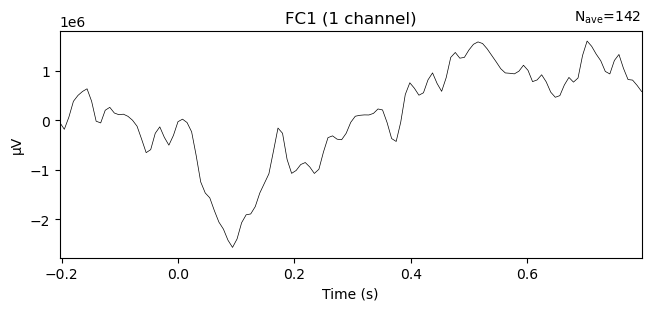

Need more than one channel to make topography for eeg. Disabling interactivity.


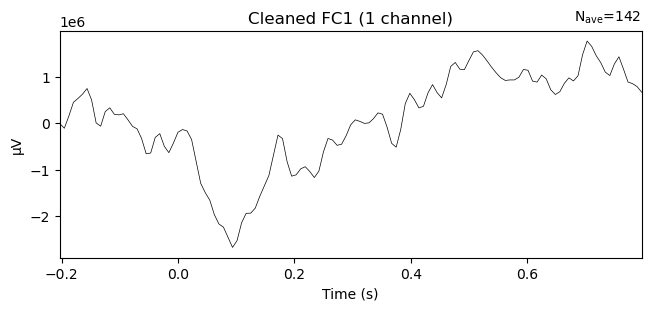

Need more than one channel to make topography for eeg. Disabling interactivity.


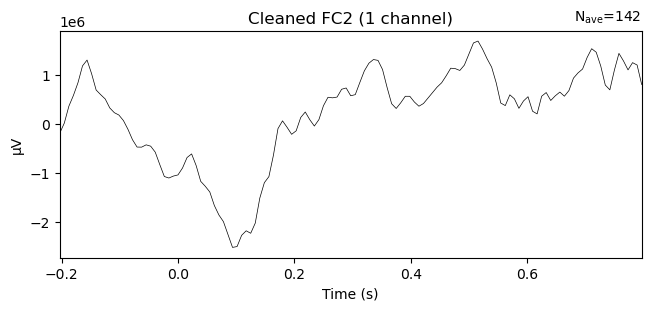

Need more than one channel to make topography for eeg. Disabling interactivity.


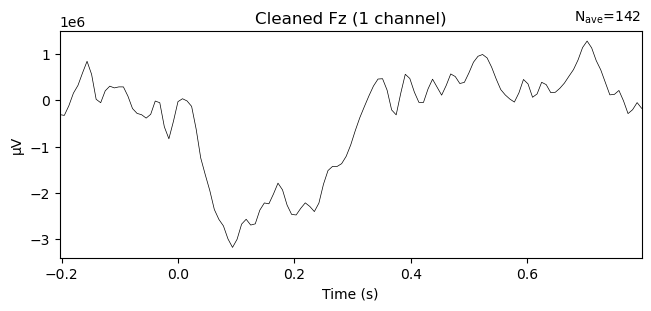

No projector specified for this dataset. Please consider the method self.add_proj.
No projector specified for this dataset. Please consider the method self.add_proj.
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Bad Channels:  ['Fp1', 'Fp2', 'F8', 'FC1', 'C3', 'Fz', 'AF3', 'F7', 'FC6', 'T8']


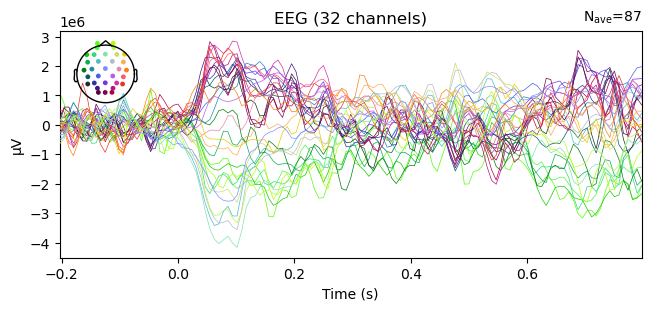

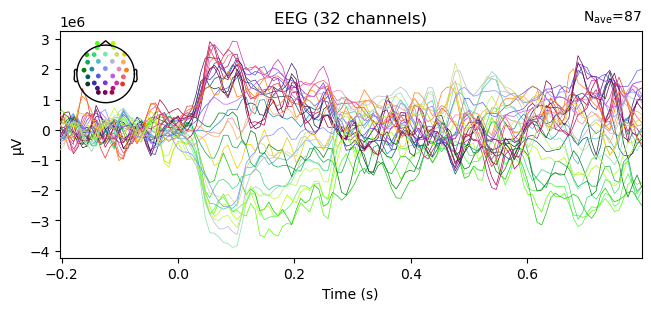

Need more than one channel to make topography for eeg. Disabling interactivity.


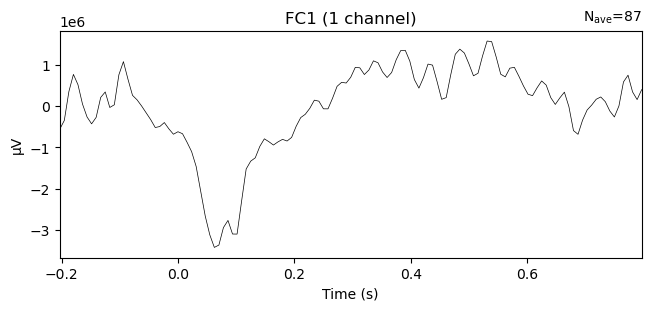

Need more than one channel to make topography for eeg. Disabling interactivity.


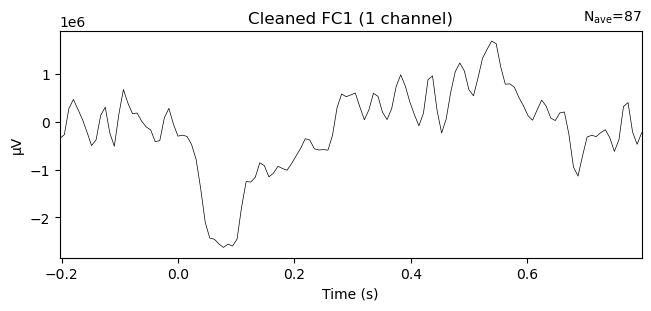

Need more than one channel to make topography for eeg. Disabling interactivity.


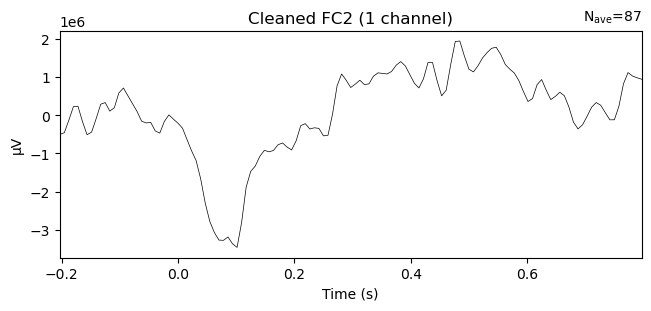

Need more than one channel to make topography for eeg. Disabling interactivity.


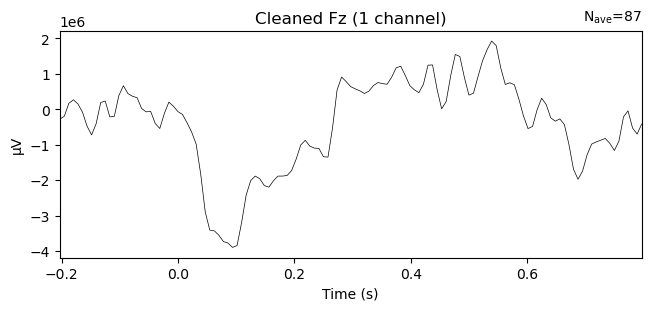

No projector specified for this dataset. Please consider the method self.add_proj.
No projector specified for this dataset. Please consider the method self.add_proj.
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Bad Channels:  ['Fp1', 'Fp2', 'T7', 'P7', 'AF3', 'CP5', 'FC5', 'T8', 'CP6']


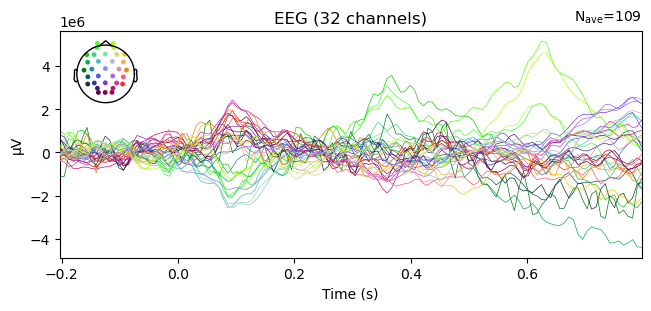

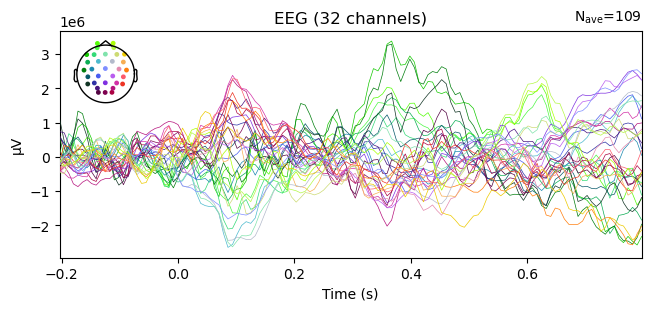

Need more than one channel to make topography for eeg. Disabling interactivity.


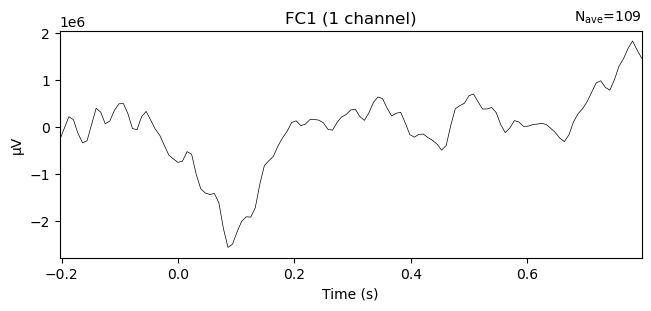

Need more than one channel to make topography for eeg. Disabling interactivity.


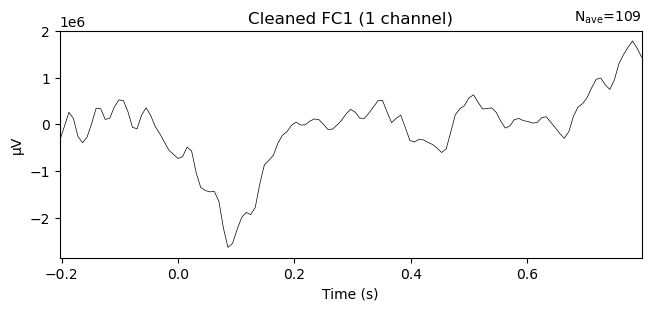

Need more than one channel to make topography for eeg. Disabling interactivity.


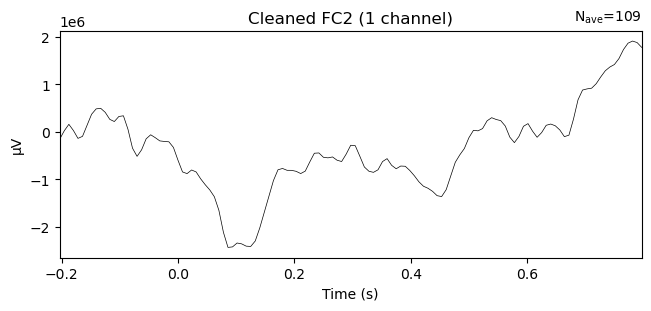

Need more than one channel to make topography for eeg. Disabling interactivity.


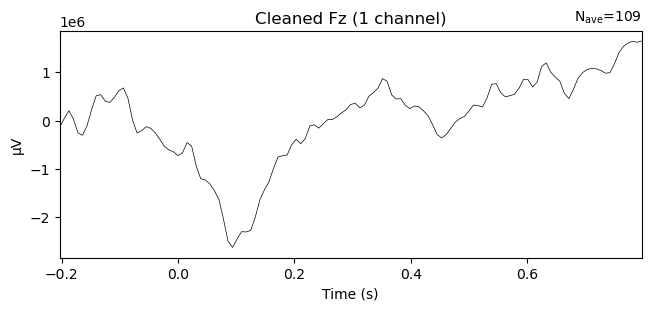

No projector specified for this dataset. Please consider the method self.add_proj.
No projector specified for this dataset. Please consider the method self.add_proj.
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Bad Channels:  ['Fp1', 'Fp2', 'T7', 'F8', 'AF3', 'F7', 'FC6', 'AF4', 'FC5', 'T8']


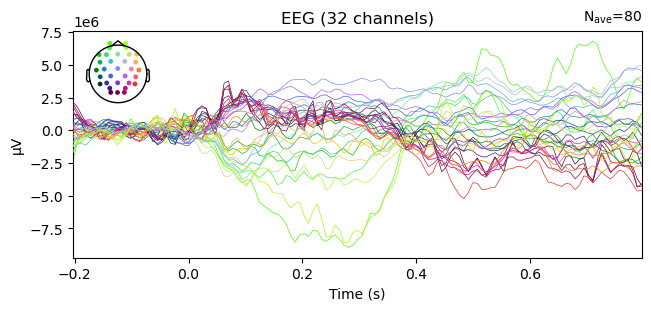

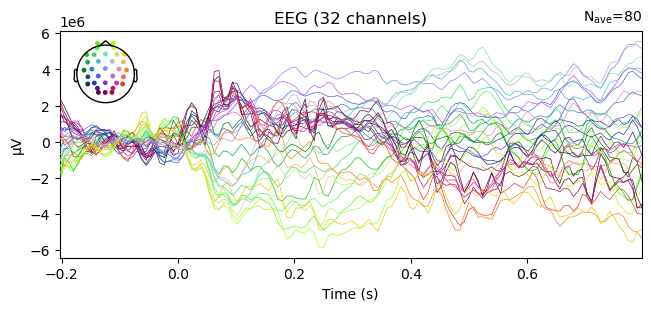

Need more than one channel to make topography for eeg. Disabling interactivity.


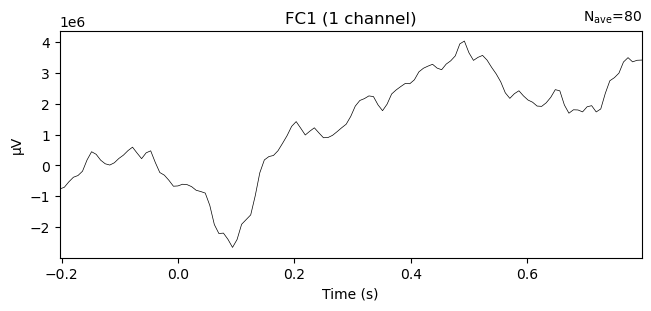

Need more than one channel to make topography for eeg. Disabling interactivity.


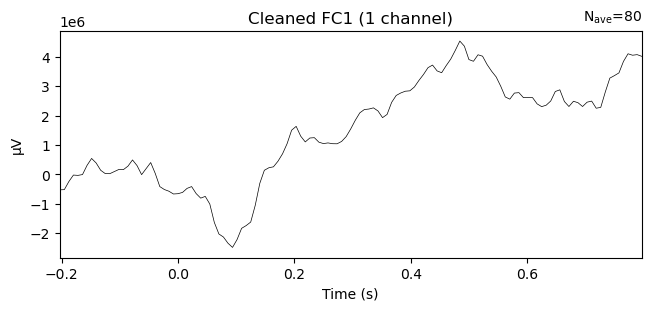

Need more than one channel to make topography for eeg. Disabling interactivity.


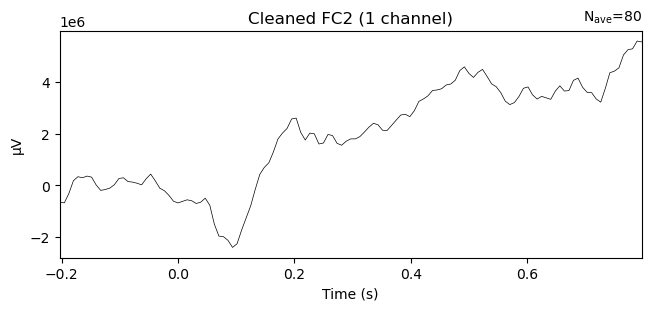

Need more than one channel to make topography for eeg. Disabling interactivity.


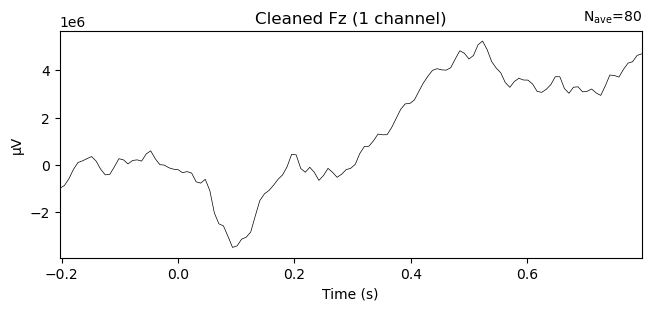

In [163]:
from mne.preprocessing import ICA
from autoreject import AutoReject
from mne_features.univariate import compute_kurtosis
from pyprep.find_noisy_channels import NoisyChannels
from scipy.stats import kurtosis


evokeds = []

show_plots = True

debug = False

for i in range(12):
    if i != 3 and i != 8 and i != 7:
        data = process_mat_file(f'data/S{i:02d}.mat')
        # data = process_mat_file(f'data/S01.mat')

        X_set = data['X']
        Y = data['Y']
        I = data['I']
        id_lab = data['id_lab']
        chann = data['chann']

        period_of_loc = list(zip(np.where(data['Y'] == 24)[0], np.where(data['Y'] == 25)[0]))
        loc_ignored_input = np.where((Y == 3) | (Y == 4))[0]

        start_index = np.where(Y == 20)[0][0]

        start_time = I[0, np.where(Y == 20)[0][0]]

        sfreq = 128  # Sampling frequency (Hz)
        n_channels = 44  # Number of channels
        n_times = X_set.shape[1]  # Number of time points
        ch_types = ['eeg'] * 32 + ['eog'] * 4 + ['emg'] * 4 + ['gsr'] + ['bio'] + ['resp'] + ['temperature']
        info = mne.create_info(ch_names=list(chann), sfreq=sfreq, ch_types=ch_types)
        montage = mne.channels.make_standard_montage('standard_1020')
        info_electrodes = mne.create_info(ch_names=montage.ch_names, sfreq=info['sfreq'], ch_types='eeg')
        info_electrodes.set_montage(montage)
        info.set_montage(montage)
        raw = mne.io.RawArray(X_set, info, verbose=False)

        
        raw.crop(tmin=start_time, include_tmax=True)

        # adding a band filter of 0.2 to 40 Hz to remove low-frequency drift and power line noise
        raw = raw.filter(l_freq=0.2, h_freq=40, picks="eeg", method='iir', verbose=False)

        raw = raw.set_eeg_reference(ref_channels='average', verbose=False)
        
        # corrected for eye movement using a regression based subtraction method
        weights = mne.preprocessing.EOGRegression(picks="eeg").fit(raw)
        raw = weights.apply(raw, copy=False)

        # Find bad channels, using interpolation
        kurtosis_values = kurtosis(raw.copy().get_data()[0:32], axis=1, fisher=True)
        if debug:
            print(kurtosis_values, len(kurtosis_values))
        # Set a threshold for identifying bad channels (adjust this as needed)
        threshold = kurtosis_values.mean() # Example threshold value
        # Identify bad channels using kurtosis value
        bad_channels = np.where(kurtosis_values > threshold)[0]
        raw_cleaned = raw.copy()
        raw_cleaned.info["bads"] = list(chann[bad_channels])



        # Identify bad channels by correlation with a threshold of 0.4
        nd = NoisyChannels(raw_cleaned.copy(), do_detrend=False)
        nd.find_bad_by_correlation(correlation_threshold=0.4)
        raw_cleaned.info["bads"].extend(nd.get_bads())
        raw_cleaned.info["bads"] =list(set(list(raw_cleaned.info["bads"])))

        print("Bad Channels: ", list(raw_cleaned.info["bads"]))
        # Interpolate the bad channels

        raw_cleaned = raw_cleaned.interpolate_bads(verbose=False)

        if show_plots:
            pass
            # mne.viz.plot_raw_psd(raw_cleaned)

        # raw = raw.set_eeg_reference(ref_channels='average', verbose=False)
        raw_cleaned = raw_cleaned.set_eeg_reference(ref_channels='average', verbose=False)


        # fig, axs = plt.subplots(2, figsize=(14, 14))
        # for i, channel in enumerate(raw.copy().get_data()[0:32]):
        #     axs[0].plot(channel[0:5000], label=chann[i])

        # for i, channel in enumerate(raw_cleaned.copy().get_data()[0:32]):
        #     axs[1].plot(channel[0:5000], label=chann[i])

        # Create events for mne
        events = []
                
        for index in loc_ignored_input:
            event = [int(index - np.round(0.1 * 128)), 0, 1]
            events.append(event)
        events = np.array(events)

        # Create Epochs
        tmin = -0.2  # 200ms before the event
        tmax = 0.8  # 800ms after the event
        epochs = mne.Epochs(raw, events, tmin=tmin, tmax=tmax, preload=True, baseline=(tmin, 0), verbose=False)
        epochs_cleaned = mne.Epochs(raw_cleaned, events, tmin=tmin, tmax=tmax, preload=True, baseline=(tmin, 0), verbose=False)
        # ar = AutoReject()
        # epochs = ar.fit_transform(epochs) 

        # # Compute Average
        evoked = epochs.average()
        evoked_cleaned = epochs_cleaned.average()

        if show_plots:
            evoked.plot()
            evoked_cleaned.plot()
        # evoked.filter(l_freq=1, h_freq=30)

        evokeds.append(evoked_cleaned)

        if show_plots:
            # evoked_cleaned.filter(l_freq=1, h_freq=20)
            evoked.plot(picks="FC1", titles="FC1", verbose=0)
            evoked_cleaned.plot(picks="FC1", titles="Cleaned FC1", verbose=0)
            evoked_cleaned.plot(picks="FC2", titles="Cleaned FC2", verbose=0)
            evoked_cleaned.plot(picks="Fz", titles="Cleaned Fz", verbose=0)


Identifying common channels ...
No projector specified for this dataset. Please consider the method self.add_proj.


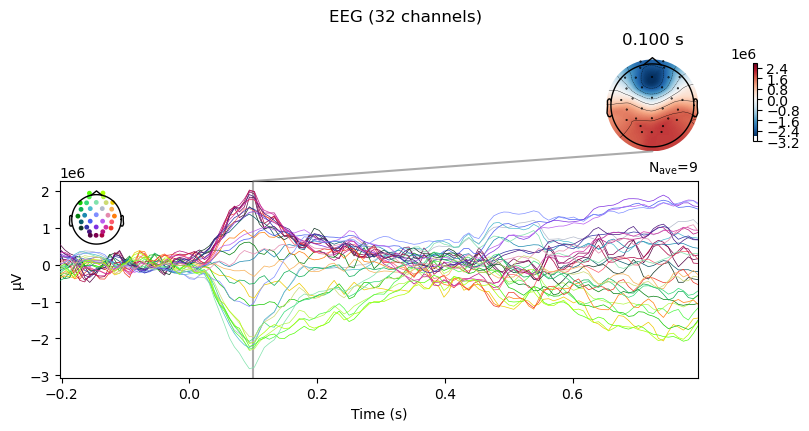

Identifying common channels ...
No projector specified for this dataset. Please consider the method self.add_proj.


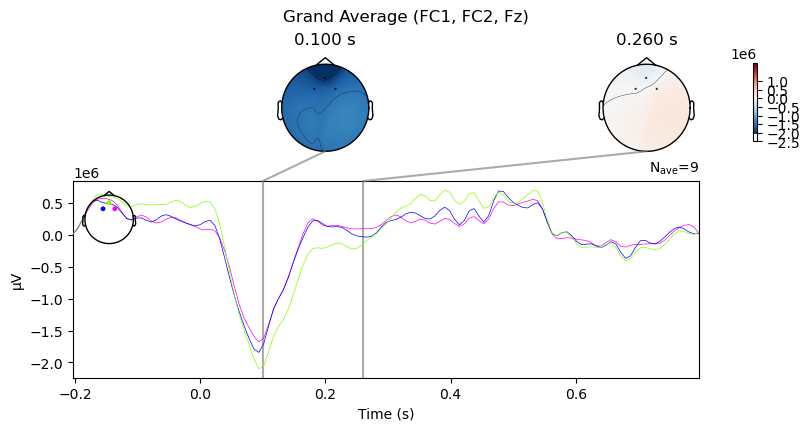

In [164]:
mne.grand_average(evokeds).plot_joint(times=[0.1])

for evoke in evokeds:
    evoke.filter(l_freq=1, h_freq=30, method="iir", verbose=False)
fig = mne.grand_average(evokeds).pick(["Fz", "FC1", "FC2"]).plot_joint(times=[0.1, 0.26], title="Grand Average (FC1, FC2, Fz)").savefig("grand_average_erps.png")

In [ ]:
import matplotlib.image as mpimg 
fig, axs = plt.subplots(3, figsize=(14, 14))

img1 = mpimg.imread('normal.png')
img2 = mpimg.imread('kurtosis_mean.png')
img3 = mpimg.imread('kurtosis_>3.png')


axs[0].imshow(img1)
axs[0].axis('off')

axs[1].imshow(img2)
axs[1].axis('off')


axs[2].imshow(img3)
axs[2].axis('off')

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.2 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.20
- Lower transition bandwidth: 0.20 Hz (-6 dB cutoff frequency: 0.10 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 2113 samples (16.508 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


No projector specified for this dataset. Please consider the method self.add_proj.
No projector specified for this dataset. Please consider the method self.add_proj.
Length:  84
Not setting metadata
84 matching events found
Setting baseline interval to [-0.203125, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 84 events and 129 original time points ...
0 bad epochs dropped


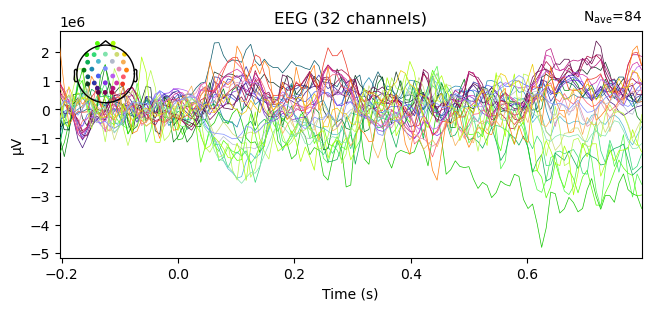

Setting up band-pass filter from 1 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 423 samples (3.305 s)



/var/folders/80/d57bc_zs3zb87qwm1byjnbf40000gn/T/ipykernel_78274/1239307538.py:134: RuntimeWarning: filter_length (423) is longer than the signal (129), distortion is likely. Reduce filter length or filter a longer signal.
  evoked.filter(l_freq=1, h_freq=30)
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


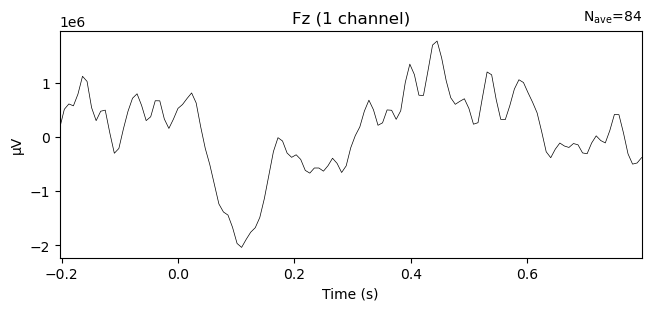

array(['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5',
       'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8',
       'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2',
       'Fz', 'Cz', 'EXG1', 'EXG2', 'EXG3', 'EXG4', 'EXG5', 'EXG6', 'EXG7',
       'EXG8', 'GSR1', 'Resp', 'Plet', 'Temp'], dtype='<U4')

In [44]:
from mne.preprocessing import ICA

data = process_mat_file('data/S00.mat')

X_set = data['X']
Y = data['Y']
I = data['I']
id_lab = data['id_lab']
chann = data['chann']

period_of_loc = list(zip(np.where(data['Y'] == 24)[0], np.where(data['Y'] == 25)[0]))
loc_ignored_input = np.where((Y == 3) | (Y == 4))[0]

start_index = np.where(Y == 20)[0][0]

start_time = I[0, np.where(Y == 20)[0][0]]

sfreq = 128  # Sampling frequency (Hz)
n_channels = 44  # Number of channels
n_times = X_set.shape[1]  # Number of time points
ch_types = ['eeg'] * 32 + ['eog'] * 4 + ['emg'] * 4 + ['gsr'] + ['bio'] + ['resp'] + ['temperature']
info = mne.create_info(ch_names=list(chann), sfreq=sfreq, ch_types=ch_types)
montage = mne.channels.make_standard_montage('standard_1020')
info_electrodes = mne.create_info(ch_names=montage.ch_names, sfreq=info['sfreq'], ch_types='eeg')
info_electrodes.set_montage(montage)
info.set_montage(montage)
raw = mne.io.RawArray(X_set, info, verbose=0)
# raw.plot_sensors(show_names=True)

# raw.info["bads"] = ["Fp1", "Fp2", "AF3", "AF4", "F7", "F3", "Fz", "F4", "F8", "FC2", "FC1", "Cz", "FC5", "FC6"]

# eeg_data = raw.copy().pick(picks="eeg")
# eeg_data_interp = eeg_data.copy().interpolate_bads(reset_bads=False)

# raw = raw.interpolate_bads(reset_bads=False)

# for title, data in zip(["orig.", "interp."], [eeg_data, eeg_data_interp]):
#     with mne.viz.use_browser_backend("matplotlib"):
#         fig = data.plot(butterfly=True, color="#00000022", bad_color="r")
#     fig.subplots_adjust(top=0.9)
#     fig.suptitle(title, size="xx-large", weight="bold")

# raw.interpolate_bads(reset_bads=False)

# fig, axs = plt.subplots(6, figsize=(14, 14)) 
# axs[0].plot(raw.copy().get_data()[0, 0:5000])

raw.crop(tmin=start_time, include_tmax=True)

# axs[1].plot(raw.copy().get_data()[0, 0:5000])

# adding a high-pass filter of 0.2 Hz to remove low-frequency drift
raw = raw.filter(l_freq=0.2, h_freq=40, picks="all")

# axs[2].plot(raw.copy().get_data()[0, 0:5000])



# adding notch filter to remove power line noise betwee 49-51 Hz
raw = raw.notch_filter([50], method='iir', verbose=0, iir_params=None, picks="all")

# axs[3].plot(raw.copy().get_data()[0, 0:5000])


# Find bad channels, using interpolation

raw = raw.set_eeg_reference(ref_channels=['Pz'], verbose=0)

# axs[4].plot(raw.copy().get_data()[0, 0:5000])
# corrected for eye movement using a regression based subtraction method
weights = mne.preprocessing.EOGRegression().fit(raw)
# weights.plot()
raw = weights.apply(raw, copy=False)

# axs[5].plot(raw.copy().get_data()[0, 0:5000])

raw = raw.set_eeg_reference(ref_channels='average', verbose=0)

# Create events for mne
events = []

# for start, end in period_of_loc:
#     # count = 0
#     for index in loc_ignored_input_left:
#         if index >= start and index <= end:
#             event = [int(index - np.round(0.1 * 128)), 0, 1]
#             events.append(event)
#         #     count += 1

#         if count >= 2:
#             break
    
#     count = 0
#     for index in loc_ignored_input_right:
#         if index >= start and index <= end:
#             event = [int(index - np.round(0.1 * 128)), 0, 1]
#             events.append(event)
#             count += 1

#         # if count >= 2:
#         #     break


for i in loc_ignored_input:
    event = [int(i - np.round(0.1 * 128)), 0, 1]
    events.append(event)

events = np.array(events)

print("Length: ", events.shape[0])


# Create Epochs
tmin = -0.2  # 200ms before the event
tmax = 0.8  # 800ms after the event
epochs = mne.Epochs(raw, events, tmin=tmin, tmax=tmax, preload=True)

# test = epochs.copy().get_data()
# test2 = epochs_nb.copy().get_data()
# plt.plot(test[0][30])
# plt.plot(test2[0][30])

# print(test[0][30].shape)


# print(test.shape)


# # Compute Average
evoked = epochs.average()

evoked.plot()

evoked.filter(l_freq=1, h_freq=30)

evoked.plot(picks="Fz", titles="Fz", verbose=0)
# evoked.plot(picks="Fz", titles="Fz", verbose=0)

# get grand average between subjects

chann

In [32]:
period_of_loc = list(zip(np.where(data['Y'] == 24)[0], np.where(data['Y'] == 25)[0]))

period_of_norm = list(zip(np.where(data['Y'] == 22)[0], np.where(data['Y'] == 23)[0]))

period_of_loc

[(37919, 53305),
 (54940, 70365),
 (122241, 137671),
 (187468, 202887),
 (203891, 219307)]

Identifying common channels ...
Need more than one channel to make topography for eeg. Disabling interactivity.


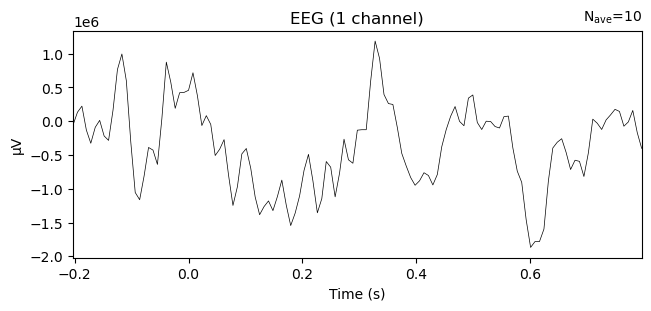

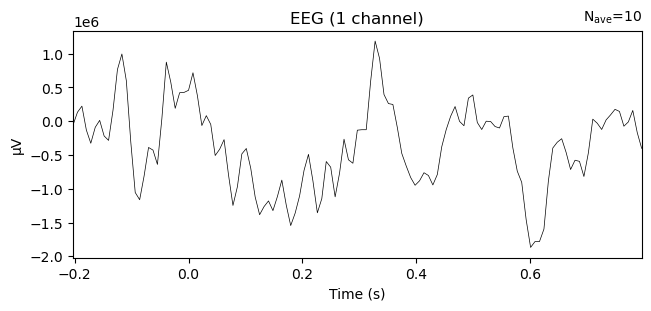

In [38]:
mne.grand_average(evokeds).pick("Fz").plot()

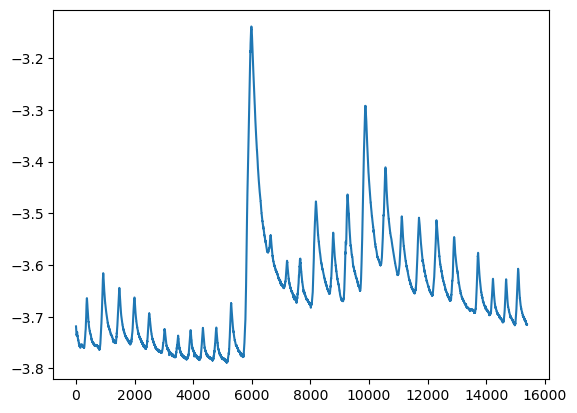

In [34]:
plt.plot(X_set[41, period_of_loc[0][0]:period_of_loc[0][1]])

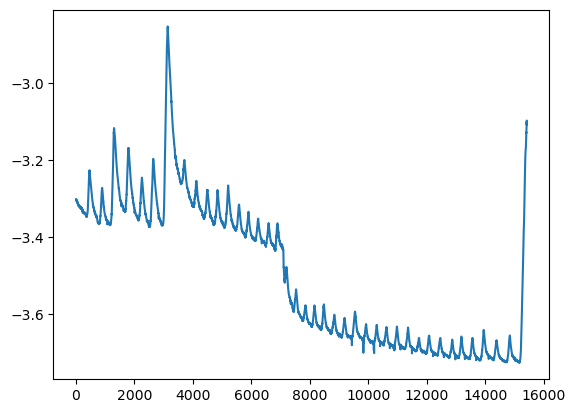

In [35]:
plt.plot(X_set[41, period_of_norm[0][0]:period_of_norm[0][1]])

## Confirming that screen freezes occur with a 5% probability
Game was played at 25 frames per second. Thats a total of 3000 frames in a 2min LOC block.

In [181]:
loc_freeze_indices = np.where(Y == 5)[0]

arr_count = []

for i in period_of_loc:
    count = 0
    for j in loc_freeze_indices:
        if j >= i[0] and j <= i[1]:
            count += 1
    arr_count.append(count)

arr_count = np.array(arr_count)

(arr_count / 3000) * 100

array([5.3       , 5.76666667, 5.46666667, 4.66666667, 4.46666667])

In [158]:
len(chann)

44

## Plotting ERP data for ignored inputs

Not setting metadata
114 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 114 events and 91 original time points ...
0 bad epochs dropped


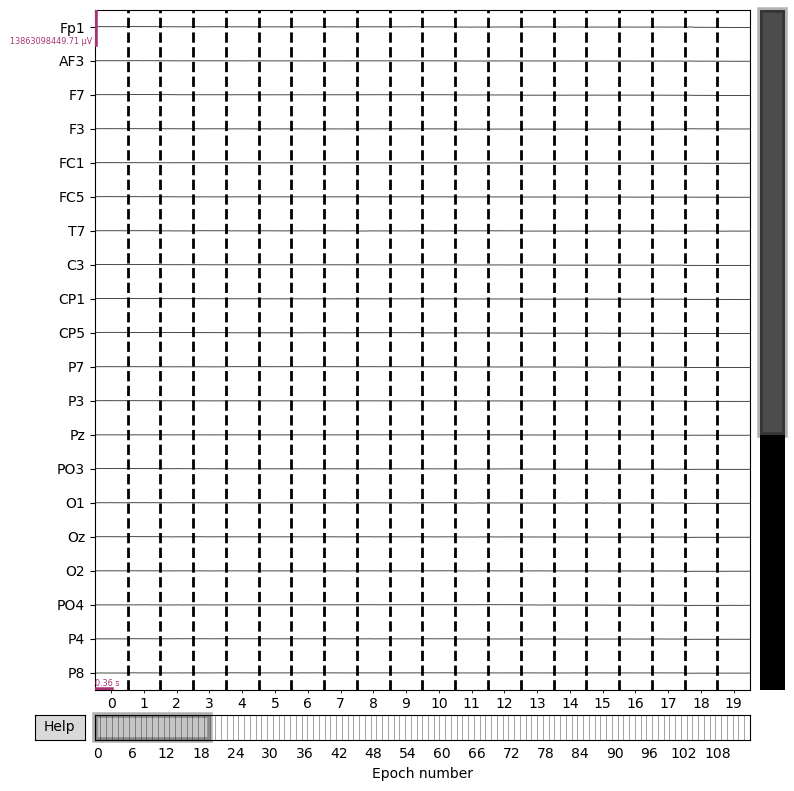

<RawArray | 4 x 248832 (1944.0 s), ~7.6 MB, data loaded>


In [202]:
data = process_mat_file('data/S04.mat')

X = data['X']
Y = data['Y']
I = data['I']
id_lab = data['id_lab']
chann = data['chann']

sfreq = 128  # Sampling frequency (Hz)
n_channels = 44  # Number of channels
n_times = X.shape[1]  # Number of time points
ch_types = ['eeg'] * 32 + ['eog'] * 4 + ['emg'] * 4 + ['gsr'] + ['bio'] + ['resp'] + ['temperature']
info = mne.create_info(ch_names=list(chann), sfreq=sfreq, ch_types=ch_types)
raw = mne.io.RawArray(X, info, verbose=0)

loc_left_indices = np.where(Y == 3)[0]
loc_right_indices = np.where(Y == 4)[0]
loc_freeze_indices = np.where(Y == 5)[0]

loc_ignored_input = np.where((Y == 3) | (Y == 4))[0]

# raw = raw.notch_filter([50], method='iir', verbose=True)
# raw = raw.filter(l_freq=0.2, h_freq=None, method="iir")
# raw.set_eeg_reference(ref_channels='average')

# weights = mne.preprocessing.EOGRegression().fit(raw)
# raw = weights.apply(raw, copy=True)


# Create events for mne
events = []
for id, index in enumerate(loc_ignored_input):
    event = [index, 0, id]
    events.append(event)

events = np.array(events)
# raw.pick([chann[30]]).plot(scalings="auto", events=events)

# # print(loc_left_indices.shape, loc_right_indices.shape)

# # # Create Epochs
tmin = -0.2  # 200ms before the event
tmax = 0.5  # 500ms after the event
epochs = mne.Epochs(raw, events, tmin=tmin, tmax=tmax, preload=True, baseline=None)

# epochs.compute_psd(fmin=0.2, fmax=40.0).plot(average=True, picks="data", exclude="bads")

# # # Compute Average
evoked = epochs.average()


# evoked.plot(picks=chann[30], titles=chann[30], verbose=0)
# # # # Plot each channel's ERPs
# for i in chann[31]:
#     fig = evoked_smooth.plot(picks=i, titles=i, verbose=0)
#     fig.savefig('plots/S00_loc_left_avg_' + i + '.png')

eog_channels = raw.pick(['eog'])
print(eog_channels)

## Creating Epochs

Creating RawArray with float64 data, n_channels=32, n_times=242569
    Range : 0 ... 242568 =      0.000 ...  1617.120 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 20 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 20.00 Hz
- Upper transition bandwidth: 5.00 Hz (-6 dB cutoff frequency: 22.50 Hz)
- Filter length: 495 samples (3.300 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.3s


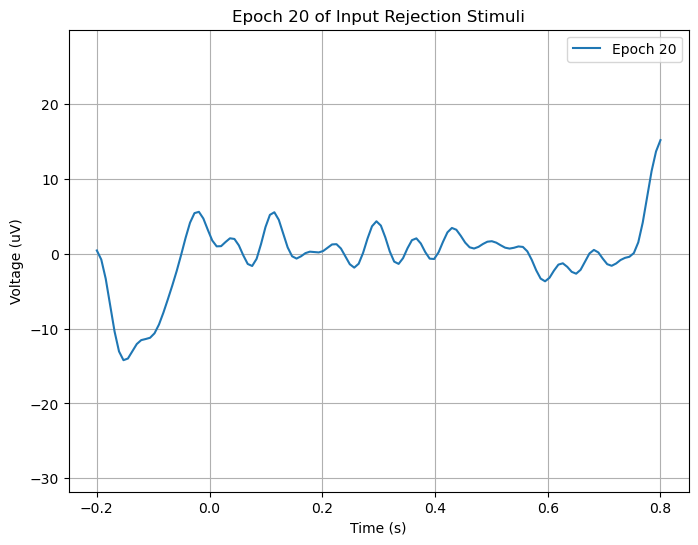

In [21]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io
import mne

# Load data from the file S00.mat
mat_data = scipy.io.loadmat('data/S00.mat')

# Extract the EEG data X, Y, and I
X = mat_data['X'][:32, 3191:]  # Use only the first 32 rows and columns after 3191
Y = mat_data['Y'][0, 3191:]
I = mat_data['I'][0, 3191:]

# Define the event codes (Y values) for ERPs
event_codes = [3,4]

# Set values in Y outside the event codes to 0
Y_events = np.where(np.isin(Y, event_codes), Y, 0)

# Find the indices where Y equals the event codes
event_indices = np.where(Y_events > 0)[0]

# Define the time window around each event (in seconds)
time_window_before = 0.2  # 200 milliseconds before event
time_window_after = 0.8  # 800 milliseconds after event

# Filter EEG data with MNE
sfreq = 150  # Sampling frequency in Hz, you might need to change this
low_freq = 1  # Low pass frequency
high_freq = 20  # High pass frequency

# Create MNE info structure
info = mne.create_info(ch_names=[f'EEG{i+1}' for i in range(X.shape[0])], sfreq=sfreq, ch_types='eeg')

# Create MNE RawArray object
raw = mne.io.RawArray(X, info)

# Filter the data
raw.filter(l_freq=low_freq, h_freq=high_freq, fir_design='firwin')

# Get the filtered data from MNE RawArray
X_filtered = raw.get_data()

# Calculate the average EEG across the selected channels
average_eeg = np.mean(X_filtered, axis=0)

# Calculate the min and max of the average EEG for scaling
eeg_min = np.min(average_eeg)
eeg_max = np.max(average_eeg)

# Randomly select 1 indices for plotting
num_plots = 1
random_indices = np.random.choice(event_indices, num_plots, replace=False)

# Iterate through the randomly selected indices
for i, random_index in enumerate(random_indices):
    # Extract the EEG readings (X) for the random event within the time window using the average EEG
    window_start = I[random_index] - time_window_before
    window_end = I[random_index] + time_window_after
    window_indices = np.where((I >= window_start) & (I <= window_end))[0]
    random_event_eeg = average_eeg[window_indices]

    # Calculate the time points for the ERP waveform
    time_points = np.linspace(-time_window_before, time_window_after, len(random_event_eeg))

    # Get the index of the random epoch in event_indices
    random_event_index = np.where(event_indices == random_index)[0][0]

    # Plot the single random event with Average EEG Data (scaled)
    plt.figure(figsize=(8, 6))
    plt.plot(time_points, random_event_eeg, label=f'Epoch {random_event_index + 1}')  # Use random_event_index for title and legend
    plt.xlabel('Time (s)')
    plt.ylabel('Voltage (uV)')
    plt.title(f'Epoch {random_event_index + 1} of Input Rejection Stimuli')  # Title with index from event_indices
    plt.ylim(eeg_min, eeg_max)  # Set y-axis limits
    plt.legend()
    plt.grid(True)
    plt.show()


## ERP Response

Creating RawArray with float64 data, n_channels=32, n_times=242569
    Range : 0 ... 242568 =      0.000 ...  1617.120 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 20 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 20.00 Hz
- Upper transition bandwidth: 5.00 Hz (-6 dB cutoff frequency: 22.50 Hz)
- Filter length: 495 samples (3.300 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


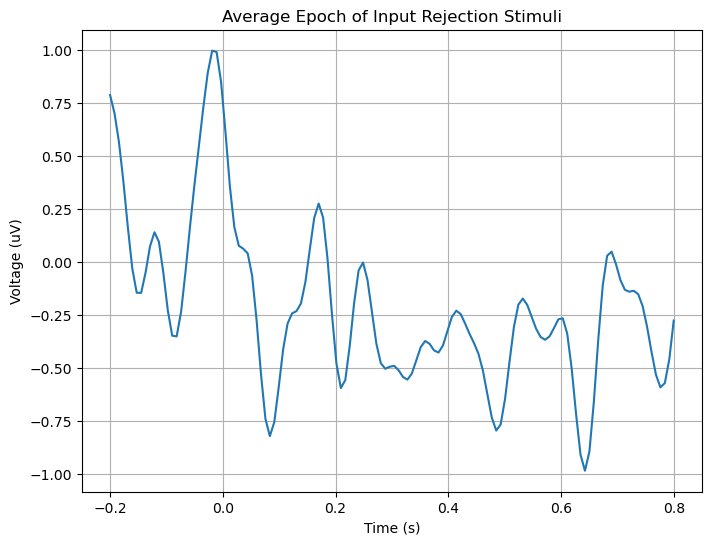

[[ 2.21457818  2.78835657  3.14593737 ... -1.23779245 -0.39077862
   0.41382975]
 [ 1.63760913  2.05108438  2.28316876 ... -0.44170567 -0.17167555
   0.32746871]
 [ 1.45991605  1.46288481  1.51822557 ...  0.60465588  0.90081989
   1.08499534]
 ...
 [ 2.83182808  3.58296534  4.21508068 ... -0.86399598 -0.00991669
   0.93622468]
 [ 1.07003786  1.31652915  1.40041305 ... -0.95892153 -0.74254965
  -0.38909714]
 [ 0.19789797  0.25731155  0.21599822 ... -0.23645984 -0.1612529
  -0.05429257]]


In [23]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io
import mne

# Load data from the file S00.mat
mat_data = scipy.io.loadmat('data/S00.mat')

# Extract the EEG data X, Y, and I
X = mat_data['X'][:32, 3191:]  # Use only the first 32 rows and columns after 3191
Y = mat_data['Y'][0, 3191:]
I = mat_data['I'][0, 3191:]

# Define the event codes (Y values) for ERPs
event_codes = [3,4]

# Set values in Y outside the event codes to 0
Y_events = np.where(np.isin(Y, event_codes), Y, 0)

# Find the indices where Y equals the event codes
event_indices = np.where(Y_events > 0)[0]

# Define the time window around each event (in seconds)
time_window_before = 0.2  # 200 milliseconds before event
time_window_after = 0.8  # 800 milliseconds after event

# Filter EEG data with MNE
sfreq = 150  # Sampling frequency in Hz, you might need to change this
low_freq = 1  # Low pass frequency
high_freq = 20  # High pass frequency

# Create MNE info structure
info = mne.create_info(ch_names=[f'EEG{i+1}' for i in range(X.shape[0])], sfreq=sfreq, ch_types='eeg')

# Create MNE RawArray object
raw = mne.io.RawArray(X, info)

# Filter the data
raw.filter(l_freq=low_freq, h_freq=high_freq, fir_design='firwin')

# Get the filtered data from MNE RawArray
X_filtered = raw.get_data()

# Calculate the min and max of the average EEG for scaling
eeg_min = np.min(X_filtered)
eeg_max = np.max(X_filtered)

# Accumulate EEG data for all epochs
all_epochs_eeg = []

# Iterate through all event indices
for event_index in event_indices:
    # Extract the EEG readings (X) for each event within the time window using the filtered EEG data
    window_start = I[event_index] - time_window_before
    window_end = I[event_index] + time_window_after
    window_indices = np.where((I >= window_start) & (I <= window_end))[0]
    event_eeg = X_filtered[:, window_indices]

    # Append the event EEG to the list
    all_epochs_eeg.append(event_eeg)

# Convert the list to a numpy array
all_epochs_eeg = np.array(all_epochs_eeg)

# Calculate the average EEG across all epochs
average_epoch_eeg = np.mean(all_epochs_eeg, axis=0)

# Calculate the time points for the ERP waveform
time_points = np.linspace(-time_window_before, time_window_after, average_epoch_eeg.shape[1])

# Plot the average epoch
plt.figure(figsize=(8, 6))
plt.plot(time_points, np.mean(average_epoch_eeg, axis=0))
plt.xlabel('Time (s)')
plt.ylabel('Voltage (uV)')
plt.title('Average Epoch of Input Rejection Stimuli')
# plt.ylim(eeg_min, eeg_max)  # Set y-axis limits
plt.grid(True)
plt.show()
print(average_epoch_eeg)

## Show average Beta Wave during stimuli during first half vs second half of experiment

Creating RawArray with float64 data, n_channels=32, n_times=242569
    Range : 0 ... 242568 =      0.000 ...  1617.120 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 13 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 13.00
- Lower transition bandwidth: 3.25 Hz (-6 dB cutoff frequency: 11.38 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 153 samples (1.020 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.3s


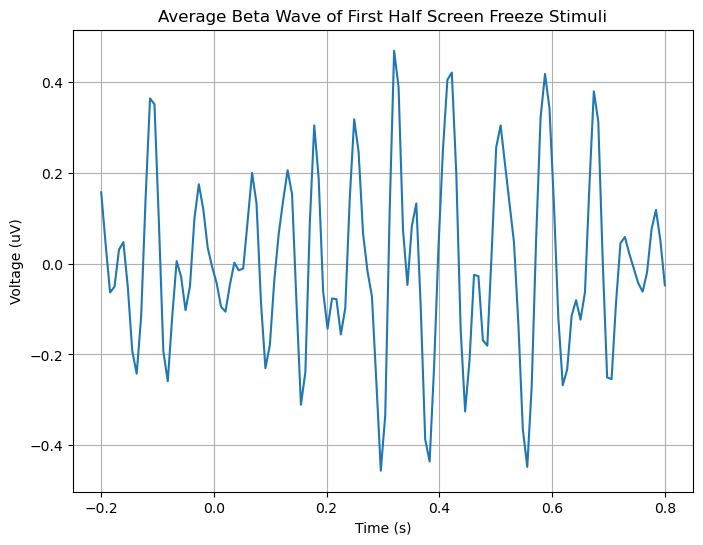

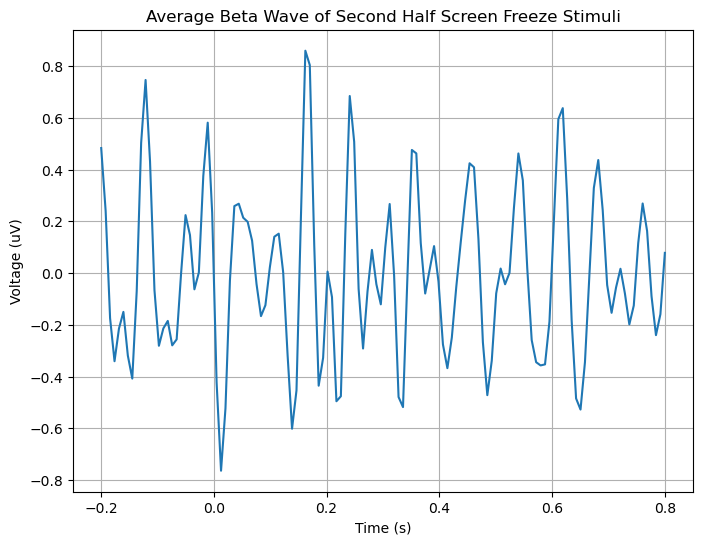

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io
import mne

# Load data from the file S00.mat
mat_data = scipy.io.loadmat('data/S00.mat')

# Extract the EEG data X, Y, and I
X = mat_data['X'][:32, 3191:]  # Use only the first 32 rows and columns after 3191
Y = mat_data['Y'][0, 3191:]
I = mat_data['I'][0, 3191:]

# Define the event codes (Y values) for ERPs
event_codes = [3,4]

# Set values in Y outside the event codes to 0
Y_events = np.where(np.isin(Y, event_codes), Y, 0)

# Find the indices where Y equals the event codes
event_indices = np.where(Y_events > 0)[0]

# Define the time window around each event (in seconds)
time_window_before = 0.2  # 200 milliseconds before event
time_window_after = 0.8  # 800 milliseconds after event

# Filter EEG data with MNE
sfreq = 150  # Sampling frequency in Hz, you might need to change this
low_freq = 13  # Lower bound of beta frequency range
high_freq = 30  # Upper bound of beta frequency range

# Create MNE info structure
info = mne.create_info(ch_names=[f'EEG{i+1}' for i in range(X.shape[0])], sfreq=sfreq, ch_types='eeg')

# Create MNE RawArray object
raw = mne.io.RawArray(X, info)

# Filter the data for beta waves
raw.filter(l_freq=low_freq, h_freq=high_freq, fir_design='firwin')

# Get the filtered data from MNE RawArray
X_filtered = raw.get_data()

# Calculate the min and max of the beta wave for scaling
beta_min = np.min(X_filtered)
beta_max = np.max(X_filtered)

# Divide the epochs into two halves
num_epochs = len(event_indices)
half_epoch = num_epochs // 2

# First Half
first_half_epochs = event_indices[:half_epoch]
all_epochs_beta_first = []

# Iterate through the first half event indices
for event_index in first_half_epochs:
    # Extract the beta wave readings (X) for each event within the time window using the filtered beta wave data
    window_start = I[event_index] - time_window_before
    window_end = I[event_index] + time_window_after
    window_indices = np.where((I >= window_start) & (I <= window_end))[0]
    event_beta = X_filtered[:, window_indices]

    # Append the event beta wave to the list
    all_epochs_beta_first.append(event_beta)

# Convert the list to a numpy array
all_epochs_beta_first = np.array(all_epochs_beta_first)

# Calculate the average beta wave for the first half
average_beta_epoch_first = np.mean(all_epochs_beta_first, axis=0)

# Calculate the time points for the beta wave
time_points_beta = np.linspace(-time_window_before, time_window_after, average_beta_epoch_first.shape[1])

# Plot the average beta wave for the first half
plt.figure(figsize=(8, 6))
plt.plot(time_points_beta, np.mean(average_beta_epoch_first, axis=0))
plt.xlabel('Time (s)')
plt.ylabel('Voltage (uV)')
plt.title('Average Beta Wave of First Half Screen Freeze Stimuli')
# plt.ylim(beta_min, beta_max)  # Set y-axis limits
plt.grid(True)
plt.show()

# Second Half
second_half_epochs = event_indices[half_epoch:]
all_epochs_beta_second = []

# Iterate through the second half event indices
for event_index in second_half_epochs:
    # Extract the beta wave readings (X) for each event within the time window using the filtered beta wave data
    window_start = I[event_index] - time_window_before
    window_end = I[event_index] + time_window_after
    window_indices = np.where((I >= window_start) & (I <= window_end))[0]
    event_beta = X_filtered[:, window_indices]

    # Append the event beta wave to the list
    all_epochs_beta_second.append(event_beta)

# Convert the list to a numpy array
all_epochs_beta_second = np.array(all_epochs_beta_second)

# Calculate the average beta wave for the second half
average_beta_epoch_second = np.mean(all_epochs_beta_second, axis=0)

# Plot the average beta wave for the second half
plt.figure(figsize=(8, 6))
plt.plot(time_points_beta, np.mean(average_beta_epoch_second, axis=0))
plt.xlabel('Time (s)')
plt.ylabel('Voltage (uV)')
plt.title('Average Beta Wave of Second Half Screen Freeze Stimuli')
# plt.ylim(beta_min, beta_max)  # Set y-axis limits
plt.grid(True)
plt.show()


## Show Emotion Scale Over Experiment

In [1]:
import numpy as np
import scipy.io
import mne

# Define the list of files to process
files = ['S00', 'S01', 'S02', 'S04', 'S05', 'S06', 'S07', 'S09', 'S10', 'S11']

# Define parameters for beta wave analysis
sfreq = 150  # Sampling frequency in Hz
low_freq = 13  # Lower bound of beta frequency range
high_freq = 30  # Upper bound of beta frequency range
event_codes = [3, 4]  # Event codes for ERPs
time_window_before = 0.2  # 200 milliseconds before event
time_window_after = 0.8  # 800 milliseconds after event

# Initialize lists to store results for all files
all_avg_percentages = []
p_values = []

# Loop through each file
for file in files:
    print(f"Processing {file}...")
    
    # Load data from the file
    mat_data = scipy.io.loadmat(f'data/{file}.mat')

    # Extract the EEG data X, Y, and I
    X = mat_data['X'][:32, 3191:]  # Use only the first 32 rows and columns after 3191
    Y = mat_data['Y'][0, 3191:]
    I = mat_data['I'][0, 3191:]

    # Set values in Y outside the event codes to 0
    Y_events = np.where(np.isin(Y, event_codes), Y, 0)

    # Find the indices where Y equals the event codes
    event_indices = np.where(Y_events > 0)[0]

    # Create MNE info structure
    info = mne.create_info(ch_names=[f'EEG{i+1}' for i in range(X.shape[0])], sfreq=sfreq, ch_types='eeg')

    # Create MNE RawArray object
    raw = mne.io.RawArray(X, info)

    # Filter the data for beta waves
    raw.filter(l_freq=low_freq, h_freq=high_freq, fir_design='firwin')

    # Get the filtered data from MNE RawArray
    X_filtered = raw.get_data()

    # Divide the epochs into two halves
    num_epochs = len(event_indices)
    half_epoch = num_epochs // 2

    # First Half
    first_half_epochs = event_indices[:half_epoch]
    all_epochs_beta_first = []

    # Iterate through the first half event indices
    for event_index in first_half_epochs:
        window_start = I[event_index] - time_window_before
        window_end = I[event_index] + time_window_after
        window_indices = np.where((I >= window_start) & (I <= window_end))[0]
        event_beta = X_filtered[:, window_indices]
        all_epochs_beta_first.append(event_beta)

    all_epochs_beta_first = np.array(all_epochs_beta_first)
    average_beta_epoch_first = np.mean(all_epochs_beta_first, axis=0)
    average_min_first = np.min(all_epochs_beta_first)
    average_max_first = np.max(all_epochs_beta_first)

    # Second Half
    second_half_epochs = event_indices[half_epoch:]
    all_epochs_beta_second = []

    # Iterate through the second half event indices
    for event_index in second_half_epochs:
        window_start = I[event_index] - time_window_before
        window_end = I[event_index] + time_window_after
        window_indices = np.where((I >= window_start) & (I <= window_end))[0]
        event_beta = X_filtered[:, window_indices]
        all_epochs_beta_second.append(event_beta)

    all_epochs_beta_second = np.array(all_epochs_beta_second)
    average_beta_epoch_second = np.mean(all_epochs_beta_second, axis=0)
    average_min_second = np.min(all_epochs_beta_second)
    average_max_second = np.max(all_epochs_beta_second)

    # Calculate percentage change between first and second halves
    percentage_change_avg_magnitude = ((np.mean(np.abs(average_beta_epoch_second)) - np.mean(np.abs(average_beta_epoch_first))) / np.mean(np.abs(average_beta_epoch_first))) * 100
    percentage_change_min_value = ((average_min_second - average_min_first) / average_min_first) * 100
    percentage_change_max_value = ((average_max_second - average_max_first) / average_max_first) * 100

    # Append average percentage change to the list
    all_avg_percentages.append((percentage_change_avg_magnitude, percentage_change_min_value, percentage_change_max_value))

    # Encapsulate percentage change in an array
    percentage_change_array = np.array([percentage_change_avg_magnitude])

    # Perform permutation test
    # Define the number of permutations
    num_permutations = 10000

    # Initialize an array to store permuted test statistics
    permuted_test_statistics = []

    # Perform permutations
    for _ in range(num_permutations):
        # Shuffle the indices of the data array
        shuffled_indices = np.random.permutation(len(percentage_change_array))

        # Calculate the test statistic (difference in average magnitude percentage changes)
        permuted_test_statistic = np.mean(percentage_change_array[shuffled_indices])

        # Append to the list of permuted test statistics
        permuted_test_statistics.append(permuted_test_statistic)

    # Calculate the observed test statistic
    observed_test_statistic = percentage_change_avg_magnitude

    # Calculate the p-value
    p_value_permutation = (np.sum(np.abs(permuted_test_statistics) >= np.abs(observed_test_statistic)) + 1) / (num_permutations + 1)

    # Append p-value to the list
    p_values.append(p_value_permutation)

    # Output the results
    print("\nPermutation Test for", file)
    print("Observed Test Statistic:", observed_test_statistic)
    print("Permutation Test p-value:", p_value_permutation)

# Print percentage change for each file
print("\nPercentage Change for Each File:")
for i, file in enumerate(files):
    print(f"{file}:")
    print("  Average Magnitude:", all_avg_percentages[i][0], "%")
    print("  Minimum:", all_avg_percentages[i][1], "%")
    print("  Maximum:", all_avg_percentages[i][2], "%")

# Print overall result
significant_subjects = sum(p < 0.05 for p in p_values)
print("\nOverall Results:")
print(f"{significant_subjects} out of {len(files)} subjects show statistically significant differences.")


Processing S00...
Creating RawArray with float64 data, n_channels=32, n_times=242569
    Range : 0 ... 242568 =      0.000 ...  1617.120 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 13 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 13.00
- Lower transition bandwidth: 3.25 Hz (-6 dB cutoff frequency: 11.38 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 153 samples (1.020 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.2s



Permutation Test for S00
Observed Test Statistic: 28.889550879162996
Permutation Test p-value: 1.0
Processing S01...
Creating RawArray with float64 data, n_channels=32, n_times=235145
    Range : 0 ... 235144 =      0.000 ...  1567.627 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 13 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 13.00
- Lower transition bandwidth: 3.25 Hz (-6 dB cutoff frequency: 11.38 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 153 samples (1.020 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.2s



Permutation Test for S01
Observed Test Statistic: -13.442880424853149
Permutation Test p-value: 1.0
Processing S02...
Creating RawArray with float64 data, n_channels=32, n_times=255113
    Range : 0 ... 255112 =      0.000 ...  1700.747 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 13 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 13.00
- Lower transition bandwidth: 3.25 Hz (-6 dB cutoff frequency: 11.38 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 153 samples (1.020 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.3s



Permutation Test for S02
Observed Test Statistic: -5.645201817687825
Permutation Test p-value: 1.0
Processing S04...
Creating RawArray with float64 data, n_channels=32, n_times=245641
    Range : 0 ... 245640 =      0.000 ...  1637.600 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 13 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 13.00
- Lower transition bandwidth: 3.25 Hz (-6 dB cutoff frequency: 11.38 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 153 samples (1.020 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.2s



Permutation Test for S04
Observed Test Statistic: -9.617677912597248
Permutation Test p-value: 1.0
Processing S05...
Creating RawArray with float64 data, n_channels=32, n_times=250249
    Range : 0 ... 250248 =      0.000 ...  1668.320 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 13 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 13.00
- Lower transition bandwidth: 3.25 Hz (-6 dB cutoff frequency: 11.38 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 153 samples (1.020 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.3s



Permutation Test for S05
Observed Test Statistic: -11.610866638924488
Permutation Test p-value: 1.0
Processing S06...
Creating RawArray with float64 data, n_channels=32, n_times=267401
    Range : 0 ... 267400 =      0.000 ...  1782.667 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 13 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 13.00
- Lower transition bandwidth: 3.25 Hz (-6 dB cutoff frequency: 11.38 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 153 samples (1.020 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.4s



Permutation Test for S06
Observed Test Statistic: -9.49908447964892
Permutation Test p-value: 1.0
Processing S07...
Creating RawArray with float64 data, n_channels=32, n_times=248841
    Range : 0 ... 248840 =      0.000 ...  1658.933 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 13 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 13.00
- Lower transition bandwidth: 3.25 Hz (-6 dB cutoff frequency: 11.38 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 153 samples (1.020 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.2s



Permutation Test for S07
Observed Test Statistic: 2.432693501894608
Permutation Test p-value: 1.0
Processing S09...
Creating RawArray with float64 data, n_channels=32, n_times=243721
    Range : 0 ... 243720 =      0.000 ...  1624.800 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 13 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 13.00
- Lower transition bandwidth: 3.25 Hz (-6 dB cutoff frequency: 11.38 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 153 samples (1.020 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.2s



Permutation Test for S09
Observed Test Statistic: 10.979359620678546
Permutation Test p-value: 1.0
Processing S10...
Creating RawArray with float64 data, n_channels=32, n_times=236169
    Range : 0 ... 236168 =      0.000 ...  1574.453 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 13 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 13.00
- Lower transition bandwidth: 3.25 Hz (-6 dB cutoff frequency: 11.38 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 153 samples (1.020 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.2s



Permutation Test for S10
Observed Test Statistic: -9.702854855671053
Permutation Test p-value: 1.0
Processing S11...
Creating RawArray with float64 data, n_channels=32, n_times=235273
    Range : 0 ... 235272 =      0.000 ...  1568.480 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 13 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 13.00
- Lower transition bandwidth: 3.25 Hz (-6 dB cutoff frequency: 11.38 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 153 samples (1.020 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.2s



Permutation Test for S11
Observed Test Statistic: 1.5904913699231062
Permutation Test p-value: 1.0

Percentage Change for Each File:
S00:
  Average Magnitude: 28.889550879162996 %
  Minimum: 102.64504404114199 %
  Maximum: 115.79673714279193 %
S01:
  Average Magnitude: -13.442880424853149 %
  Minimum: 88.84939950185158 %
  Maximum: 105.94504069077375 %
S02:
  Average Magnitude: -5.645201817687825 %
  Minimum: -44.36441054108489 %
  Maximum: -40.43981051609526 %
S04:
  Average Magnitude: -9.617677912597248 %
  Minimum: -8.411117104850057 %
  Maximum: 5.441785740135252 %
S05:
  Average Magnitude: -11.610866638924488 %
  Minimum: -17.97079933546923 %
  Maximum: 8.919280142095374 %
S06:
  Average Magnitude: -9.49908447964892 %
  Minimum: -13.281334167871318 %
  Maximum: 10.02343802668532 %
S07:
  Average Magnitude: 2.432693501894608 %
  Minimum: 14.980701245275158 %
  Maximum: 15.531656874297761 %
S09:
  Average Magnitude: 10.979359620678546 %
  Minimum: -5.016304441269476 %
  Maximum: 12

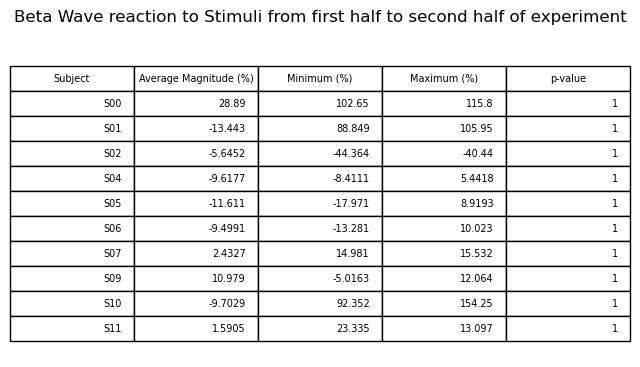

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert numerical columns to strings with 5 significant figures
for col in df.select_dtypes(include='number').columns:
    df[col] = df[col].apply(lambda x: f'{x:.5g}')

# Set up the figure and axis
fig, ax = plt.subplots(figsize=(8, 4))

# Hide axes
ax.axis('off')

# Create a table
table = ax.table(cellText=df.values, colLabels=df.columns, loc='center')

# Set font size
table.auto_set_font_size(False)
table.set_fontsize(7)  # Adjust font size as needed

# Adjust cell size
table.scale(1, 1.5)  # Scale down the table size

# Save the table as an image
plt.title("Beta Wave reaction to Stimuli from first half to second half of experiment", pad=20)
plt.savefig("beta_wave_changes_table.png", bbox_inches='tight', pad_inches=0.1, dpi=300)


In [1]:
import numpy as np
import scipy.io

# Define the list of files to process
files = ['S00', 'S01', 'S02', 'S04', 'S05', 'S06', 'S07', 'S09', 'S10', 'S11']

# Initialize lists to store average arousal scores for each half and each subject
avg_arousal_first_half = []
avg_arousal_second_half = []

for file in files:
    # Load data from the file
    mat_data = scipy.io.loadmat(f'data/{file}.mat')

    # Extract the Y and I data
    Y = mat_data['Y'][0, 3191:]
    I = mat_data['I'][0, 3191:]

    # Find the timestamp corresponding to the middle of the experiment
    midpoint_timestamp = (I[-1] + I[0]) / 2

    # Find indices where I is in the first half and second half
    first_half_indices = np.where(I <= midpoint_timestamp)[0]
    second_half_indices = np.where(I > midpoint_timestamp)[0]

    # Filter Y values based on indices for the first half and second half
    Y_first_half = Y[first_half_indices]
    Y_second_half = Y[second_half_indices]

    # Filter Y values within the arousal range (110-119) for the first half and second half
    Y_first_half_arousal = Y_first_half[(Y_first_half >= 110) & (Y_first_half <= 119)]
    Y_second_half_arousal = Y_second_half[(Y_second_half >= 110) & (Y_second_half <= 119)]

    # Convert Y values to a scale from 1 to 10
    Y_first_half_scaled = (Y_first_half_arousal - 110) / 1
    Y_second_half_scaled = (Y_second_half_arousal - 110) / 1

    # Calculate the average arousal score for each half
    avg_arousal_first_half.append(np.mean(Y_first_half_scaled))
    avg_arousal_second_half.append(np.mean(Y_second_half_scaled))

    # Print the average arousal score for this subject
    print(f"Average Arousal Score for {file}:")
    print(f"  First Half: {np.mean(Y_first_half_scaled):.2f}")
    print(f"  Second Half: {np.mean(Y_second_half_scaled):.2f}")

# Calculate the average arousal score for the first half across all subjects
avg_arousal_first_half_all = np.mean(avg_arousal_first_half)

# Calculate the average arousal score for the second half across all subjects
avg_arousal_second_half_all = np.mean(avg_arousal_second_half)

# Calculate the percentage change in average arousal score between the first half and second half
percentage_change_avg_arousal = ((avg_arousal_second_half_all - avg_arousal_first_half_all) / avg_arousal_first_half_all) * 100

# Print the overall averages and percentage change
print("\nOverall Averages:")
print(f"Average Arousal Score in the First Half: {avg_arousal_first_half_all:.2f}")
print(f"Average Arousal Score in the Second Half: {avg_arousal_second_half_all:.2f}")
print(f"Percentage Change in Average Arousal Score: {percentage_change_avg_arousal:.2f}%")


Average Arousal Score for S00:
  First Half: 4.86
  Second Half: 5.71
Average Arousal Score for S01:
  First Half: 3.29
  Second Half: 3.29
Average Arousal Score for S02:
  First Half: 3.43
  Second Half: 4.75
Average Arousal Score for S04:
  First Half: 3.57
  Second Half: 2.88
Average Arousal Score for S05:
  First Half: 4.29
  Second Half: 3.88
Average Arousal Score for S06:
  First Half: 7.43
  Second Half: 7.67
Average Arousal Score for S07:
  First Half: 4.14
  Second Half: 3.12
Average Arousal Score for S09:
  First Half: 4.86
  Second Half: 4.43
Average Arousal Score for S10:
  First Half: 5.71
  Second Half: 5.71
Average Arousal Score for S11:
  First Half: 3.29
  Second Half: 3.00

Overall Averages:
Average Arousal Score in the First Half: 4.49
Average Arousal Score in the Second Half: 4.44
Percentage Change in Average Arousal Score: -0.94%


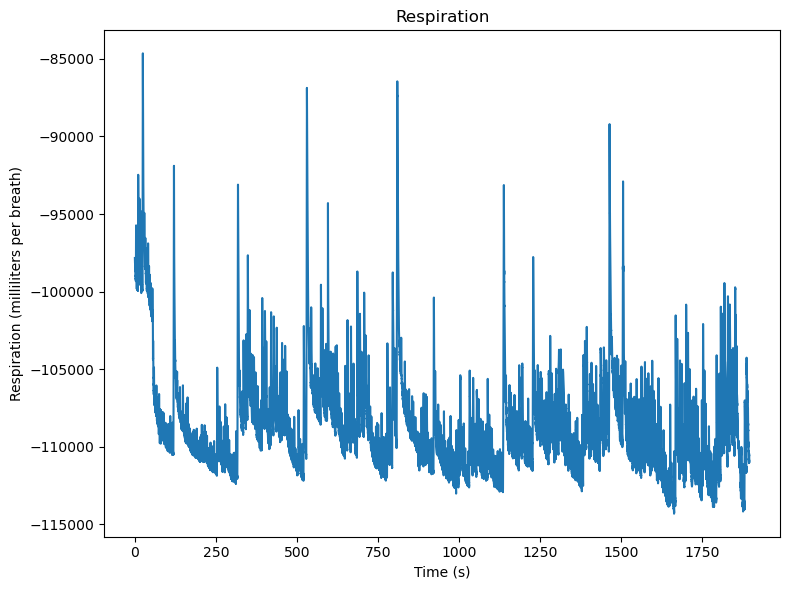

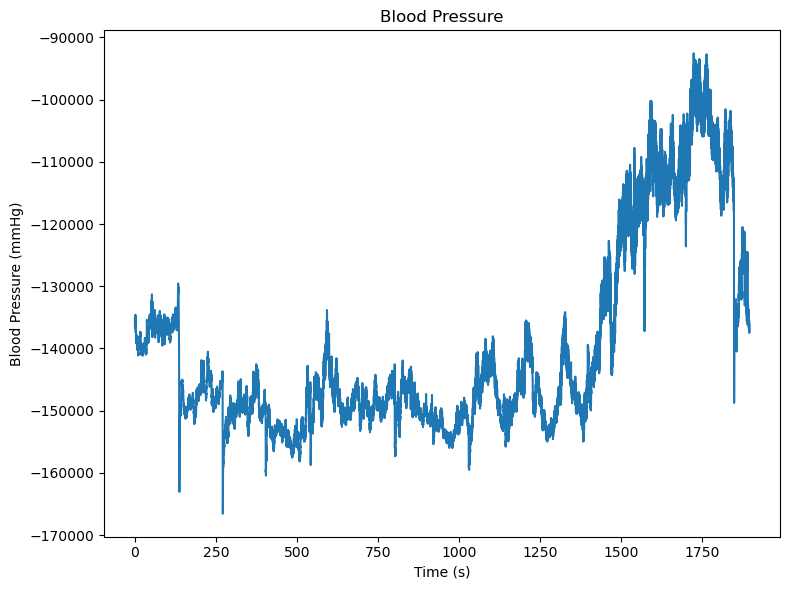

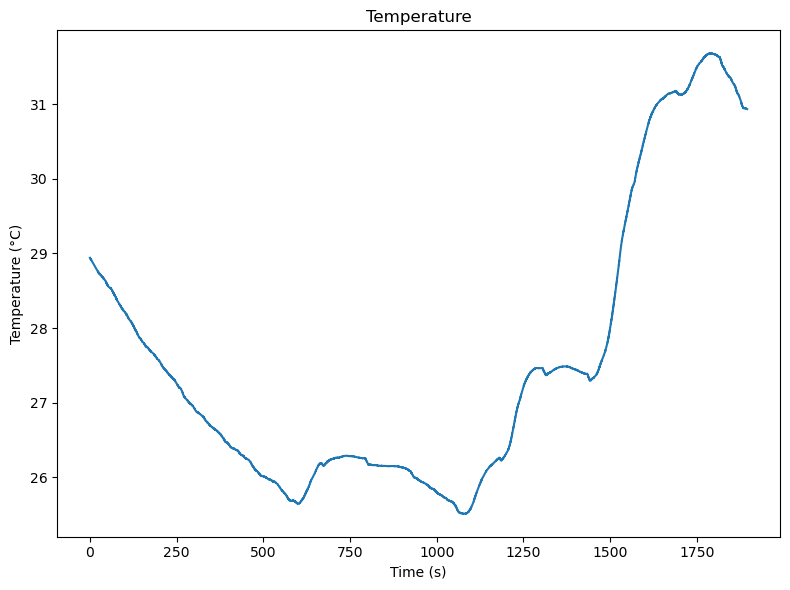

In [26]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io

# Function to load and process the data
def process_mat_file(file_path):
    mat = scipy.io.loadmat(file_path)
    X = mat['X'][:, 3191:]
    return X

# Load and process the data
X = process_mat_file('data/S00.mat')

# Extract data for blood pressure, heart rate, and respiration
resp_data = X[44]  # Row 45 for respiration
bp_data = X[45]    # Row 46 for blood pressure
temp_data = X[46]  # Row 47 for temperature

# Time axis
time = np.arange(len(resp_data)) / 128  # Assuming sampling frequency of 128 Hz

# Calculate the range of each signal
resp_range = np.ptp(resp_data)  # Peak-to-peak range of respiration data
bp_range = np.ptp(bp_data)      # Peak-to-peak range of blood pressure data
temp_range = np.ptp(temp_data)  # Peak-to-peak range of temperature data

# Plot the data for each channel in separate figures
plt.figure(figsize=(8, 6))
plt.plot(time, resp_data)
plt.title('Respiration')
plt.xlabel('Time (s)')
plt.ylabel('Respiration (milliliters per breath)')
plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 6))
plt.plot(time, bp_data)
plt.title('Blood Pressure')
plt.xlabel('Time (s)')
plt.ylabel('Blood Pressure (mmHg)')
plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 6))
plt.plot(time, temp_data)
plt.title('Temperature')
plt.xlabel('Time (s)')
plt.ylabel('Temperature (°C)')
plt.tight_layout()
plt.show()


/Users/aaronnezzer/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


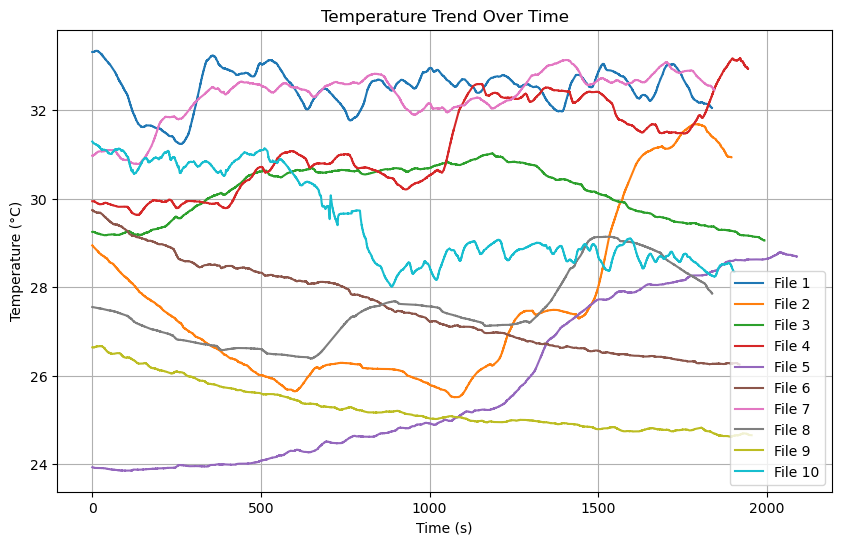

In [29]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io
import os

# Function to process the temperature data from a file
def process_temperature(file_path):
    mat = scipy.io.loadmat(file_path)
    temp_data = mat['X'][-1, 3191:]  # Assuming temperature is the last row (index -1)
    return temp_data

# Directory containing the data files
data_dir = 'data/'

# List to store the temperature data from each file
temperature_data = []

# Process temperature data from each file
for file_name in os.listdir(data_dir):
    if file_name.endswith('.mat'):
        file_path = os.path.join(data_dir, file_name)
        temp_data = process_temperature(file_path)
        temperature_data.append(temp_data)

# Plot temperature data for each file
plt.figure(figsize=(10, 6))
for i, temp_data in enumerate(temperature_data, start=1):
    time = np.arange(len(temp_data)) / 128  # Assuming sampling frequency of 128 Hz
    plt.plot(time, temp_data, label=f'File {i}')

plt.title('Temperature Trend Over Time')
plt.xlabel('Time (s)')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.grid(True)
plt.show()
